# 회귀분석

## 1. 회귀분석 예제
- `예측문제 prediction` : 특정한 입력변수값을 사용하여 출력변수의 값을 계산하는 것
- `회귀 regression`, `회귀분석 regression analysis` : 예측문제 중에서 출력변수의 값이 연속값인 문제
    - 보스턴 집값 예측
    - 당뇨병 진행도 예측
    - 캘리포니아 주택가격 예측
    - 가상 데이터 예측 : make_regression() 등   

## 2. 선형회귀분석의 기초
- `선형회귀모형의 구조 파악`
    - 상수항 결합 : 상수항을 독립변수로 추가함
    - 최소자승법 : OLS : 잔차제곱합으로 가중치 벡터 구하기
    - 직교방정식 : 잔차 벡터의 성질, 평균 벡터의 성질
- `여기에서 나온 수학적 증명 방법이 확률론적선형모형, 분산분석, 아웃라이어, 정규화 등의 이론에서 사용된다.`

### 2-1. 선형회귀분석의 모형
- 회귀분석은 독립변수 x에 대응하는 종속변수 y와 가장 비슷한 값 \hat{y}를 출력하는 함수 f(x)를 찾는 과정과 같다.
- 선형함수 f(x)가 다음과 같을 때 **선형회귀모형 linear regression model**이라고 한다.
    - $\hat{y} = w_0 + w_1x_1 + \cdots + w_Dx_D = w_0 + w^Tx$
- 선형회귀 모형을 사용하는 회귀분석을 **선형회귀분석**이라고 한다.
- 가중치 벡터 w : 함수 f(x)의 **계수 coefficient, 모수 parameter**

### 2-2. 상수항 결합
- `상수항 결합 bias augmentation` : 회귀분석 모형 수식을 간단하게 만들기 위해 상수항을 독립변수 데이터에 추가하는 것
    - import statsmodels.api as sm
    - sm.add_constant(X)

### 2-3. 최소자승법
- `최소자승법 OLS Ordinary Least Squares` : 잔차제곱합(RSS:Residual Sum of Squares)을 최소화하는 가중치 벡터를 구하는 방법
    - 최소자승법을 통해서 선형회귀모형의 가중치 벡터를 구할 수 있다.
    - 잔차제곱합 -> 가중치 벡터로 미분(그레디언트 벡터) -> 공분산 행렬이 역행렬이 존재 할 때 가중치 벡터 w를 구할 수 있다.
    - 역행렬 존재 -> 도함수의 최저값 조건 -> 2차 도함수인 해시안 행렬이 양의 정부호(positive definite)이어야 한다. 
    - 이것은 X의 독립변수, 각 행렬이 서로 독립이어야 한다는 조건을 따른다. (풀랭크)

### 2-4. 직교방정식
- 최소자승법에서 구한 그레디언트 벡터로 직교방정식을 구할 수 있다.
    - 그레디언트 벡터 = 0 이면 양변의 식을 정리
- 직교방정식을 통해서 알 수 있는 성질
    - 모형에 상수항이 있는 경우 잔차 벡터의 원소의 합은 0이다. 또한 잔차 벡터의 평균도 0이다.
    - x 데이터의 평균값 \bar{x}에 대한 예측값은 y 데이터의 평균값 \bar{y}와 같다.
- **NumPy 사용**
    - OLS의 해를 직접 이용 : np.linalg.inv(X.T @ X) @ X.T @ y
- **Scikit-learn 패키지 사용**
    - from sklearn.linear_model import LinearRegression
- **statsmodels 패키지 사용**     
    - OLS 클래스 : model = sm.OLS.from_formula("y~x1 + x2", data=df)
    - 독립변수, 종속변수 df가 따로인 경우 : sm.OLS(dfX, dfy) : 상수항 결합 있어야함
    - 선형회귀모형 학습 : result = model.fit()
    - 학습 결과 보고서 : print(result.summary())
    - y값 예측 : result.predict(x)
    - 가중치 벡터 확인 : result.params (상수항과 계수에 대한 값 확인)
    - 잔차 벡터 확인 : result.resid

## 3. 스케일링
- `큰 조건수의 의미 : 민감도가 커져 데이터의 변화에 따른 가중치 벡터의 오차가 커진다.`
- `조건수가 크게 나오는 경우`
    - 독립변수간 스케일의 차이 : 스케일링으로 해결
    - 다중공선선이 있는 경우(독립변수간 상관관계가 있는 경우) : 변수선택, PCA로 해결

### 3-1. 조건수
- `조건수 condition number` : 회귀분석에서는 공분산 행렬 X^TX의 가장 큰 고유값과 가장 작은 고유값의 비율
    - $\text{condition number} = \dfrac{\lambda_{max}}{\lambda_{min}}$
- OLS 분석 레포트 확인
    - condition number is large : 조건수가 크다
    - strong multicollinearity : 강한 다중공선성의 문제가 있을 수 있다.
- **조건수가 크면 계수행렬 A와 상수벡터 b에 대한 해 x의 민감도가 커진다.**
    - Ax = b
    - 따라서 계수행렬 A나 상수벡터 b에 존재하는 **오차가 해에 미치는 영향이 커진다.**
- 조건수가 가장 작은 경우
    - 계수행렬 A가 단위 행렬인 경우 : cond(I) = 1, 조건수의 최저값 = 1
- 조건수가 작은 경우 
    - 상수 벡터에 "약간의 오차" -> 연립방정식의 해에도 "동일한 수준의 오차"가 발생
- 조건수가 큰 경우 
    - 상수 벡터에 "약간의 오차" -> 연립방정식의 해의 "매우 큰 오차"가 발생
- **따라서 공분산행렬 X^TX의 조건수가 크면 회귀분석을 사용한 예측값도 오차가 커진다.**

### 3-2. 회귀분석과 조건수
- 회귀분석에서 조건수(condition number)가 커지는 경우
    - 1) 변수들의 단위 차이로 인해 숫자의 스케일이 크게 달라지는 경우 : **스케일링(scaling)**으로 해결한다.
    - 2) 다중공선성(multicollinearity), 상관관계가 큰 독립 변수들이 있는 경우 : **변수선택(VIF)**, **PCA를 사용한 차원 축소** 등으로 해결한다.
- 간단한 예 : 보스턴 집값 데이터에서 독립변수의 스케일링이 안된 상태에서 OLS 회귀분석을 하면 조건수가 매우 크게 나온다. 
    - R-squared 값도 작게 나온다.
- OLS 클래스 사용시 독립변수 스케일링
    - 모형지정 문자열 from_formula() 함수에서 **scale("x1")** 명령 사용
    - scale_feature = ["scale({})".format(name) for name in feature_names]    

## 4. 범주형 독립변수
- `범주형 독립변수가 있는 경우의 선형회귀분석 모형을 만들 수 있다.`
    - 상수항 없으면 : 풀랭크 방식
    - 상수항 있으면 : 축소랭크 방식 (기준 더미변수는 항상 1, 상수항 역할)
    - 독립변수간 상호작용

### 4-1. 범주형 변수가 하나인 경우
- 기본적인 방법은 범주형 독립변수를 갖는 독립변수를 범주형 값 별로 구분하여 각각 모형을 만들어 주는 방법
    - 범주값이 A, B인 경우 : model A와 model B 2개의 선형회귀모형을 만들어 분석한다.
- 올바른 선형회귀모형에서는 어떤 가중치가 다른 가중치의 변화에 따라서 변화하지 않아야 한다. 
    - 위의 방법은 model A와 model B에 따라서 가중치의 값이 달라지게 된다.
- 따라서 **범주형 독립변수를 더미변수로 변환해 준다.**
    - 더미변수는 상수항을 포함하고 있으므로 상수항이 없어지게 된다.

### 4-2. 풀랭크 방식
- `풀랭크 방식 full-rank` : 더미변수의 값을 원핫인코딩(one-hot-encoding) 방식으로 지정
    - 범주값에 해당하는 더미변수는 1, 범주값에 해당하지 않는 더미변수는 0이 된다.
    - 따라서 더미변수의 "가중치"는 상수항이 된다.
- 상수항만 달라지고 다른 독립변수의 가중치는 영향을 받지 않는 모형이 된다.
- **선형회귀모형에 범주형 독립변수가 있는 경우는 더미변수의 가중치 이외에 다른 상수항이 있으면 안된다.**
    - 왜냐하면 별도의 상수항 w0와 범주형 독립변수의 가중치 w1A가 구분되지 않는다.
    - 범주형 독립변수가 있는 경우 별도의 상수항 결합을 하지 않는다.
    
### 4-3. 축소랭크 방식
- `축소랭크 방식 reduced-rank` : 특정한 하나의 범주값을 기준값(reference, baseline)으로 하고 기준값에 대응하는 더미변수의 가중치는 항상 1로 놓는 방식
    - 다른 범주형 값을 갖는 경우는 기준값에 추가적인 특성이 있는 것으로 간주한다.
- 기준값이 되는 더미변수는 항상 1로 놓으므로, 이 기준 더미변수의 가중치가 상수항으로 남아있는다.
    - 여기에 다른 범주값이 선택되면 이 범주값에 해당하는 더미변수의 가중치가 기준 가중치(상수항이 된)에 더해진다.

#### 예제 : 노팅엄 지역의 월 평균 기온 데이터
- 풀랭크 방식의 OLS 모델 생성 : sm.OLS.from_formula("value ~ C(month) + 0", data=df_nottem)
    - +0 : 상수항 포함
    - 1월~12월이 범주값이 된다.
    - 데이터 임포트 : df_nottem = sm.datasets.get_rdataset("nottem").data
    - month : 범주형 독립변수
    - 모형지정 문자열에서 month를 범주형 독립변수로 지정 : C(month)
    - 각 범주값(1월~12월)에 따라서 12개의 가중치가 반환된다. 
    - 풀랭크이므로 1월인 경우 더미변수의 값의 d(1,0,0,...,0) 즉 w1만 남는다.
- 축소랭크 방식의 OLS 모델 생성 : sm.OLS.from_formula("value ~ C(month)", data=df_nottem)
    - 기본적으로 1월 평균기온을 기준 상수항이 된다.
    - 각 월의 평균 기온이 1월 평균기온 보다 얼마나 높은지를 나타내는 값이 회귀모형의 계수가 된다.

#### 예제 : 보스턴 집값 데이터의 범주형 변수
- 보스턴 집값 데이터에서 CHAS 범주형 독립변수는 0, 1 두개의 범주값을 갖는다.
    - **범주형 독립변수가 있는 경우 상수항 가중치를 갖는 모형을 만들면 축소랭크 방식으로 더미변수 변환한 것과 같은 의미이다.**
    - 이 상수항이 축소랭크 방식에서 기준 상수항의 역할을 한다.
    - 상수항 가중치 포함하지 않으면 풀랭크 방식이 된다.
    - 두 방식으로 회귀분석 한 결과 계수값은 같다.

### 4-4. 두 개 이상의 범주형 변수가 있는 경우
- **범주형 독립변수가 두 개 이상 있는 경우 : 축소형 방식 사용**
    - 상수항 결합을 해준다. : 모형지정 문자열에서 +0 포함
- 범주형 값의 조합이 많아 지므로 여러가지 모델이 발생한다.

### 4-5. 범주형 독립변수와 실수 독립변수의 상호작용
- `상호작용 interaction` : 범주형 독립변수의 값이 달라질 때(A, B) 더미변수 값에 따라서 상수항이 달라진다. 이때 상수항만 달라지는 것이 아니라 다른 독립변수들이 종속변수에 미치는 영향도 달라지는 모형을 만들때 사용한다.
    - 즉 범주값의 변화에 따라서 다른 독립변수의 가중치도 달라지는 모형
- 범주값에 따라서 다른 독립변수가 영향을 받는 경우
    - 범주형 독립변수 x_1에 의해서 다른 독립변수 x_2가 영향을 받는다는 의미
- 범주형 독립변수 x1과 x1과 상호작용을 하는 다른 독립변수(실수형) x2 둘다 종속변수에 영향을 미치는 경우
- `위의 두가지 경우를 지정 문자열로 나타내는 방법 확인 할 것`
- **독립변수가 종속변수에 미치는 영향 : 가중치 w = 계수 = 모수**

## 5. 부분회귀
- `특정 독립변수의 종속변수와의 순수한 상관관계(영향력)를 알 수 있다.`
    - 프리슈-워-로벨 정리 FWL
    - 부분회귀 플롯
    - CCPR 플롯

### 5-1. 부분회귀의 의미
- 회귀분석을 한 후에 새로운 독립변수를 추가하여 다시 회귀분석을 하는 경우
    - 예를들면 새로운 특징 벡터가 추가 되는 경우
    - 집값 예측에서 "시내버스와의 거리"라는 독립변수가 추가 되는 경우
- **새로운 독립변수 그룹 X2를 추가해서 다시 회귀분석을 하면 기존 가중치 벡터의 값이 달라지게 된다.**
    - $w^{'}_1 = w_1 - (X^T_1X_1)^{-1}X^T_1X_2w^{'}_2$
    - 기존 가중치 벡터의 값과 다르다.
- 두 회귀분석의 결과가 같은 경우
    - 1) w'2=0 인 경우 : 새로운 독립변수 그룹 X2가 종속변수 y와 상관관계가 없는 경우
    - 2) XT_1X2=0 인 경우 : 독립변수 X1과 새로운 독립변수 X2가 직교하는 경우, 두 독립변수가 서로 상관관계가 없으면 직교할 가능성이 높다.

### 5-2. 프리슈-워-로벨 정리
- `프리슈-워-로벨 정리 Frisch-Waugh-Lovell, FWL`
    - 1) 특정한 독립변수 그룹 X1으로 종속변수 y를 선형회귀분석하여 잔차 y* 를 구한다.
    - 2) X1들로 다른 독립변수 x2를 선형회귀분석하여 잔차 x2* 을 구한다.
    - 3) y* 를 종속변수, x2* 를 독립변수로 하여 선형회귀분석을 한다.
    - 여기에서 나온 가중치는 X1과 x2를 모두 사용하여 y를 선형회귀분석하였을 때 x2에 대한 가중치와 같다.
        - $x^{*^T}_2 x^{*}_2 w_2 = x^{*^T}_2 y^{*}$
- 이 식의 증명과정에서 **잔차행렬 M의 성질**을 사용하게 된다.

### 5-3. 부분회귀 플롯
- `부분회귀 플롯 Partial Regression Plot` : 독립변수의 갯수가 많을 때 특정한 하나의 독립변수의 영향력을 시각화 하는 방법
    - Added Variable Plot 이라고도 함
    - **어떤 독립변수에서 다른 독립변수들의 성분을 제거해주는 것과 같은 의미이다.**
- 부분회귀 플롯을 그리는 방법
    - **프리슈-워-로벨 정리(FWL)의 방법을 사용**
    - 여기에서 구해진 잔차들(x2*, y*)의 스캐터플롯과 회귀분석 결과를 나타낸 것과 같다.

#### 예제 : 보스턴 집값 데이터
- AGE 독립변수와 MEDV 종속변수의 관계는 상관관계가 있는 것 처럼 보인다. 
    - 그래프의 기울기가 0이 아닌 경우, 미미한 +, - 라도 상관관계 있다고 본다.
- statsmodels 패키지 사용
    - sm.graphics.plot_partregress("MEDV", "AGE", others, data=df, obs_label=False, ret_coords=True)
    - **변수 이름 : endog : 종속변수, exog : 독립변수**
- 부분회귀 플롯을 사용하여 AGE와 MEDV 변수의 상관관계를 분석하면 상관관계가 없는 것으로 나온다. 
    - 부분회귀 플롯의 가로축 AGE는 다른 독립변수의 영향을 제거한 **순수한 독립변수의 성분**을 뜻한다.
    - AGE의 데이터가 아니고 AGE에서 다른 성분을 뺀 데이터
- 전체 독립변수에 대한 부분회귀 플롯
    - sm.graphics.plot_partregress_grid(result, fig=fig)
    
### 5-4. CCPR 플롯
- `CCPR Component-Component plus Residual` : 특정한 하나의 변수의 영향을 살펴보기 위한 방법, 부분회귀 플롯과 의미가 같다.
    - 스캐터 플롯의 일종
- statsmodels 패키지 사용
    - sm.graphics.plot_ccpr(result, "AGE")
- 전체 독립변수에 대한 CCPR
    - sm.graphics.plot_ccpr_grid(result, fig=fig)

#### 부분회귀 플롯과 CCPR 플롯을 한번에 나타내기
- sm.graphics.plot_regress_exog(result, "AGE")

## 6. 확률론적 선형 회귀모형
- `최소자승법 OLS로 구한 가중치의 신뢰도(신뢰구간)를 구한다.`
    - 부트스트래핑, 재표본화
    - 확률론적 선형 회귀모형의 4가지 가정 : 가우시안 정규분포, 잡음에 대한 가정
    - 최대가능도 방법과 OLS 방법의 결과는 같다.
    - 잡음과 잔차의 관계, 잡음과 가중치의 관계를 통한 성질 확인
    - 회귀계수의 표준오차 : std err
    - 단일계수 t-검정 : 계수 값에 대한 검정, 두 계수가 같은지 비교
    - 회귀분석 F-검정 : 같은 데이터에대한 회귀모형끼리 성능을 비교할 때 기준값

### 6-1. OLS 방법의 신뢰도는?
- OLS 방법을 사용하여 구한 최적의 가중치 벡터 w가 어느 정도 신뢰할 수 있는지 확인 해야한다.
    - 왜냐하면 표본에서 계산된 "추정치"이기 때문이다.
    - 어떤 독립변수의 x1의 가중치가 -2라고 할 때 이 값이 정확하다면 x1은 종속변수와 반비례한다고 결론을 내릴 수 있다.
    - 그러나 추정오차의 크기가 2.5라고 한다면 실제 가중치는 -2 +,- 2.5이므로 -4.5~0.5의 범위가 된다.
    - 실제 가중치는 0이 될 수도 있고 양수가 될 수도 있다. 그렇다면 반비례한다는 결론이 아닌 아무 상관 없다거나 비례한다는 결과가 나올 수 있다.
- 가중치 추정치의 신뢰도를 구하기 위해서 신뢰 구간을 구해야 한다.

### 6-2. 부트스트래핑
- `부트스트래핑 bootstrapping` : 회귀분석에 사용한 표본 데이터가 달라질 때 회귀분석의 결과는 어느 정도 영향을 받는지 확인하기 위한 방법
    - **OLS로 구한 가중치의 추정치는 표본 데이터에 따라서 달라진다.**
    - 따라서 여러가지 표본 데이터 집합을 바꾸어서 가중치의 변화 정도를 알수 있다.
    - 현실적으로 추가적인 데이터를 얻기 어렵다.
- `재표본화 re-sampling` : 기존의 데이터에서 여러가지 다양한 표본 데이터 집합을 만드는 방법
    - 새로운 데이터를 얻기 어려우므로 기존 데이터를 재표본화하여 가중치의 변화정도를 확인할 수 있다. 
    - 중복 선택도 가능하게끔하여 최대한 다양한 데이터 샘플을 만든다.
- **데이터의 분포 확인**
    - sns.distplot(x, ax=ax1)
- 추정치 평균과 분산의 관계로 신뢰구간 확인
    - 평균 + - 표준편차*2
    - 이 범위에서 추정치가 음수, 0, 양수로 바뀌는지에 따라서 독립변수에 대한 분석이 달라지게 된다.

#### OLS 레포트에서 확인가능
- `OLS 레포트의 값은 부트스트래핑이 아닌 확률론적 선형 회귀모형을 사용하여 구한 값이다.`
- **std err** : 추정치의 표준편차
- **[0.025  0.975]** : 신뢰구간

### 6-3. 확률론적 선형 회귀모형
- OLS 레포트에서 가중치의 추정치에 대한 표준편차(std err), 신뢰구간의 값은 부트스트래핑이 아닌 확률론적 선형 회귀모형으로 구한 값이다.
- 확률론적 선형 회귀모형을 사용하면 부트스트래핑 처럼 많은 계산을 하지 않고도 빠르고 안정적으로 가중치 추정값의 오차를 구할 수 있다.
- 확률론적 선형 회귀모형은 데이터가 확률변수로 부터 생성된 표본이라고 가정한다.

### 확률론적 선형 회귀모형의 4가지 가정
- 1) `선형정규 분포 가정`
    - **종속변수 y는 가우시안 정규 분포를 따른다.**
    - 기댓값 : x의 선형조합 w^Tx 
    - 분산 : \sigma^2
    - 잡음 \epsilon 으로 선형회귀모형을 나타낼 수 있다. : $\epsilon = y-w^Tw$
- 2) `외생성 가정 Exogeneity`
    - **잡음 \epsilon의 조건부 기대값은 독립변수 x에 상관없이 항상 0이라고 가정한다.** : $\text{E}[\epsilon | x] = 0$
    - 무조건부 기댓값 = 0
    - 잡음 \epsilon과 독립변수 x가 상관관계가 없다.
- 3) `조건부 독립 가정`
    - **i번째 표본의 잡음과 j번째 표본의 잡음의 공분산 값이 x와 상관없이 항상 0이라고 가정한다.** : $\text{Cov}[\epsilon_i, \epsilon_j] = 0$
    - \ep_i와 \ep_j는 서로 독립이다.
    - 잡음 벡터 \ep의 공분산 행렬은 대각행렬이 되어야한다. : $\text{Cov}[\epsilon] = \text{E}[\epsilon \epsilon^T] = \text{diagonal matrix}$
- 4) `등분산성 가정`
    - **\ep_i와 ep_j의 분산 값이 표본과 상관없이 항상 같다고 가정한다.**
    - 잡음 벡터 \ep의 공분산 행렬이 항등핼렬이 되어야 한다. : $\text{Cov}[\epsilon] = \text{E}[\epsilon \epsilon^T] = \sigma^2 I$
    
### 6-4. 최대 가능도 방법을 사용한 선형 회귀분석
- 확률론적 선형 회귀모형의 가정과 최대 가능도 방법(MLE : Maximum Likelihood Estimation)을 사용하여 가중치 벡터 w의 값을 구한다.
    - 최대가능도방법 : MLE : 변화하는 값을 모수로, 고정된 상수를 독립변수로 바꾸어 확률분포를 계산하는 방법
    - 누적 계산을 통해 모수를 추정하기 위한 방법으로 다양한 확률분포에서 최적의 모수를 찾기 위해 사용된다.
- 가능도 방법에 로그를 적용하면 곱하기를 더하기로 바꿀 수 있어 식이 간단해진다.
- **로그 가능도 방법으로 구한 식을 최적화하면(w벡터로 미분하여 그레디언트 벡터를 구하고 이 벡터가 0이라고 하면) OLS 방법으로 구한 것과 동일한 결과를 얻을 수 있다.**
    - $\hat{w} = (X^TX)^{-1}X^Ty$
    - 또한 직교방정식도 같다.
    
### 6-5. 잔차의 분포
- `확률론적 선형 회귀모형에 따르면 잔차는 정규분포를 따른다.`
    - $e = y - \hat{y} = y - Hy = (I-H)y = My = M(Xw + \epsilon)$
    - $e = M\epsilon$
- 잔차는 잡음의 선형변환(linear transform)이다. 정규분포의 선형변환은 정규분포이므로 잔차 e도 정규분포를 따른다.
    - 잡음 \epsilon은 정규분포를 따른다.
    
#### 잔차의 정규성 검정
- `정규성 검정 normality test` : 확률분포가 가우시안 정규분포를 따르는지 확인
    - 옴니버스 검정 : sm.stats.omni_normtest(result.resid)
    - 자크-베라 검정 : sm.stats.jaque_bera(result.resid)
    - 콜모고로프-스미르노프 검정 : sm.stats.kstest_normla(result.resid)
- `잔차의 기댓값도 x와 상관없이 0`이다.
    - 잡음(=오차, disturbans)의 기댓값이 x와 상관없이 0이다. (외생성 가정)

### 6-5. 회귀 계수의 표준 오차
- `회귀 계수의 표준오차 standard error of regression coefficient` : 가중치 벡터 w의 표준편차
    - OLS 방법으로 구한 가중치 벡터의 신뢰도, 추정오차에 대한 값
    - OLS 레포트에서 "std err"에 해당하는 값

#### 구하는 방법
- `가중치 벡터 w의 예측치의 공분산 행렬을 구하고, 공분산 행렬의 대각성분이 분산이므로, 이 분산으로부터 표준편차를 구한다.`
- 가중치의 예측치 \hat{w}도 정규분포확률변수인 \epsilon의 선형변환이므로 정규분포를 따른다. 
    - $\hat{w} = w + (X^TX)^{-1}X^T\epsilon$
- \hat{w}의 기댓값은 w와 같다.
    - $\text{E}[\hat{w}] = w$
    - \hat{w}는 w의 비편향 추정값이다.      
- \hat{w}의 공분산
    - $\text{Cov}[\hat{w}] = \sigma^2(X^TX)^{-1}$
- 잔차의 분산으로부터 잡음의 분산을 추정
    - $\text{E}[e^2] = \sigma^2(N-K)$
- 잡음에 대한 비편향 표본분산
    - $s^2 = \dfrac{e^Te}{N-k} = \dfrac{RSS}{N-K}$
- \hat{w}(가중치의 예측치)의 공분산 추정값
    - $\text{Cov}[\hat{w}] \approx s^2(X^TX)^{-1}$
- w_i의 분산은 공분산 행렬의 대각성분
    - $\text{Var}[\hat{w}_i] = (\text{Cov}[\hat{w}])_{ii}$
- w 예측치의 표준오차 : 표준편차
    - $\sqrt{\text{Var}[\hat{w}_i]} \approx se_i = \sqrt{s^2((X^TX)^{-1})_{ii}}$
- **정규화된 모수오차는 자유도가 N-K인 표준스튜던트 t분포를 따른다.** 

### 6-6. 단일 계수 t-검정

#### 정규화된 모수오차로 검정
- 정규화된 모수오차를 검정통계량을 사용하여 wi가 0 인지 아닌지에 대한 검정을 할 수 있다.
    - $H_0 : w_i = 0 \; (i=0,\cdots,K-1)$
    - 유의확률이 0이면 귀무가설 기각 : wi = 0 일 가능성이 작다.
    - 유의확률이 유의수준보다 크면 귀무가설 채택 : wi = 0 일 가능성이 크다.
    - **즉 wi, 독립변수 xi 들의 가중치가 종속변수와 상관관계가 있는지 없는지를 검정한다.**
- OLS 레포트에서 이 검정에 대한 유의확률 : P>|t|
    - 즉 기본적으로 OLS 레포트는 wi=0인지에 대한 검정을 계산해준다.

#### `단일 계수-t 검정 single coefficient t-test`
- **단일 계수-t검정을 사용하면 wi=0 이 아닌 경우도 검정할 수 있다.**
    - $H_0 : w_1 = 60$
    - w1의 값은 50이다라는 귀무가설을 검정할 수 있다.
    - 유의확률을 확인하여 판단할 수 있다.
- statsmodels
    - print(result.t_test("x1=60")) : 독립변수의 이름과 가중치 값을 넣어준다.
- **두 독립변수의 계수값 비교**
    - 두 독립변수의 계수값을 비교하는 검정을 할 수 있다.
    - print(result.t_test("x1=x2"))
    - 유의확률을 확인하여 귀무가설이 기각되면 두 독립변수의 계수값은 다르다는 의미
    - 귀무가설이 채택되면 두 독립변수의 계수값은 거의 같다는 의미
    - 두 독립변수의 계수값이 같다고 하면 하나는 제거해도 모형의 성능에 변화가 없다.

### 6-7. 회귀분석 F-검정
- `회귀분석 F-검정 regression F-test` : 여러 회귀모형의 유의확률을 비교하고 어떤 모형이 더 성능이 좋은지 비교한다.
- 전체 회귀 계수(모수, 가중치 벡터)가 모두 의미가 있는가에 대한 귀무가설
    - 즉 $H_0 : w_1=w_2=...=w_{k-1}=0$
    - 모든 독립변수의 가중치가 0이냐 아니냐에 대한 검정으로, 이 모형의 성능이 어느정도인지 알 수 있다.
- 대부분의 경우 이 귀무가설은 기각된다.
    - 유의확률의 값이 작을 수록 귀무가설의 기각이 강하므로 더 의미가 있는 모형이다.
    - 유의확률의 값이 클 수록 귀무가설의 채택이 강하므로 성능이 떨어지는 모형이다.
- **OLS 레포트**
    - F-검정 통계량 : F-statistic    
    - 유의확률 : Prob(F-statistic)

## 7. 회귀분석의 기하학

### 7-1. 회귀 벡터공간
- 예측값 \hat{y}를 X의 각 열 c1,...,cM의 선형조합으로 표현 할 수 있다.
    - $\hat{y} = Xw = w_1c_1 + w_2c_2 + \cdots + w_Mc_M$
    - ci는 X의 열벡터
- 모든 열 ci가 선형독립(풀랭크)이면 예측값 \hat{y}는 X의 각 열을 **기저벡터(basis vector) 로 하는 벡터공간 위에 존재한다.**

#### 회귀모형의 각 상수항을 벡터공간에 나타내면
- 예측값 \hat{y}
    - 종속변수와 예측값의 차이인 잔차 벡터를 가장 작게 만드는 최적의 예측값
    - 벡터공간 내에 존재
    - y와 가장 가까운 벡터
    - 종속변수 y를 X의 각 열 ci를 기저벡터로 하는 벡터공간에 **투영한 벡터**
- 잔차 벡터 e
    - 실제값(종속변수)과 예측값의 차이
    - 벡터공간에 직교
    - 종속변수 y를 벡터공간에 투영하고 남은 **직교 벡터**

### 7-2. 잔차행렬과 투영행렬
- `변형행렬 transform matrix` : 벡터 a에서 벡터 b를 변형하는 데 쓰이는 행렬 T
    - $b = Ta$
- `잔차행렬 residual matrix` : 종속값 벡터 y를 잔차 벡터 e로 변환하는 행렬 M
    - $e = My$
    - $M = I-H = I - X(X^TX)^{-1}X^T$
- `투영행렬 projection matrix` : 종속값 벡터 y를 예측값 벡터 \hat{y}로 변환하는 행렬 H
    - $\hat{y} = Hy$
    - $H = X(X^TX)^{-1}X^T$
    - 햇(hat)행렬, **영향도 행렬(influence matrix)**

#### 잔차행렬 M과 투영행렬 H의 성질
- 1) 대칭행렬이다.
    - $M^T=M,\;\; H^T=H$
- 2) 멱등행렬(idempotent)이다. : 자기자신을 몇번을 곱하든 자기자신이 되는 행렬
    - $M^2=M^5=M,\;\; H^2=H^7=H$
- 3) M과 H는 서로 직교한다.
    - $MH = HM = 0$
- 4) M은 X와 직교한다.
    - $MX=0$
- 5) X에 H를 곱해도 변하지 않는다.
    - $HX=H$

#### 종속변수와 추정치, 잔차의 관계
- 종속변수 y벡터의 제곱합은 잔차벡터 e의 제곱합과 추정치 벡터 $\hat{y}$의 제곱합의 합과 같다.
- $y = \hat{y} + e = Hy + My = (H + M)y$
- $y^Ty = \hat{y}^T\hat{y} + e^Te$
    - 이 관계식을 잔차행렬 M과 투영행렬 H의 성질을 이용하여 정리한다.
- 이 관계식은 분산분석(ANOVA)에서 사용된다.    

## 8. 레버리지와 아웃라이어
- 개별적인 데이터 표본 하나하나가 회귀분석 결과에 미치는 영향력을 알 수 있다.
- 레버리지 : 영향도 행렬의 대각성분, 실제값과 예측값의 관계
    - 개별 데이터의 잔차의 표준편차에 영향을 준다.
- 아웃라이어 : 잔차가 큰 표본 데이터를 지칭하는 용어
- 레버리지가 큰 데이터는 모형에 영향을 준다.
    - 레버리지가 크지만 잔차가 작으면 모형에 영향을 주지 않는다.
- 쿡스디스턴스값, 폭스추천값 : 레버리지와 잔차값을 계산하여 아웃라이어를 찾아준다.
    - **이 데이터를 제거하면 모형의 성능이 향상된다.**

### 8-1. 레버리지
- `레버리지 leverage` : 종속값=실제값=y가 예측치=$\hat{y}$에 미치는 영햐을 나타낸 값
    - self-influence, self-sensitivity
- 영향도 행렬로 나타낸 종속값과 예측값의 관계
    - $\hat{y} = Hy$
    - 영향도 행렬(influence matrix)
    - hat 행렬(hat matrix)
- **레버리지는 영향도 행렬의 대각성분 $h_{ii}$와 같다.**
    - 실제 결과값 $y_i$가 예측값 $\hat{y}_i$에 미치는 영향이다.
    - 예측점을 종속값 자신으로 끌어 당기는 정도와 같다.
- 영향도 행렬의 대각성분 $h_{ii}$가 1이 되고, 나머지 성분들 $h_{ij}$가 모두 0이면 모든 실제값과 예측값이 같아지게 된다.
    - $h_{ii} = 1,\; h_{ij} = 0 \; (for \; i \neq j) \rightarrow \hat{y}_i = y_i$
- 하지만 이러한 영향도 행렬은 가능하지 않다.

### 8-2. 레버리지의 특성
- 레버리지 값 즉 영향도 행렬 H이 대각성분은 1보다 작거나 같고, 0보다 크거나 같다.
    - $0 \leq h_{ii} \leq 1$
    - **레버리지 값은 양수이다.**
- 레버리지의 합은 모형에 사용된 모수의 갯수 K와 같다.
    - 상수항이 포함되어 있는 1차원 모형이면 K=2이다.
    - $tr(H) = \sum_{i}^{N} h_{ii} = K$
    - **레버리지 값의 총합은 K이다.**
- 모수의 갯수 K값을 데이터의 갯수 N개의 변수가 나누어 갖는 것과 같은 개념
- 현실 데이터는 N이 K보다 훨씬 크다.
- 따라서 레버리지의 값이 동시에 1이 될 수는 없다.
    - K=3을 N=10개의 h_ii가 나누어 가졌다면, h_ii의 합은 K이어야 한다.
    - 그런데 모든 h_ii가 1이면 N=10 이므로 총합이 K가 아니라 10이 된다.
- 레버리지의 평균값
    - $h_{ii} \approx \dfrac{K}{N}$
    - 모수의 갯수를 데이터의 갯수로 나눈값과 유사하다.
- 레버리지 값이 1에 가까울 수록 실제값과 예측값이 유사하다는 것
- 레버리지 값이 0에 가까울 수록 실제값과 예측값이 다르다는 것

### 8-3. statsmodels
- OLS 패키지의 RegressionResults 클래스의 get_influence 메서드로 구할 수 있다.
    - 즉 OLS 모델의 예측 결과 객체에 영향도 행렬의 정보값이 들어있다.
    - influence = result.get_influence()    
- 영향도 정보 객체 안에 레버리지 벡터의 값이 들어 있다.
    - hat = influence.hat_matrix_diag
    - plt.stem(hat) 으로 각 데이터의 레버리지 값을 그래프로 나타낼 수 있다.
- 즉 레버리지는 각각의 표본에 대한 종속값과 예측값 사이의 관계를 나타낸다.
    - **레버리지 값이 큰 데이터 표본들은 무리지어 있는 데이터들과 떨어져 있다.**
    
### 8-4. 레버리지의 영향
- 레버리지가 큰 표본 데이터는 모형에 큰 영향을 준다.
    - 레버리지는 크지만, 오차가 작은 데이터는 모형에 미치는 영향이 작다.
- 레버리지가 작은 표본 데이터는 모형에 영향을 미치지 않는다.

### 8-5. 아웃라이어
- `아웃라이어 outlier` : 잔차가 큰 데이터. 데이터와 동떨어진 값을 갖는 데이터.
    - 실제값과 예측값의 차이=잔차가 큰 표본 데이터 
    - 선형회귀모형으로부터 떨어져 있다.
- 아웃라이어는 데이터 그 자체를 의미함
    - 잔차가 큰 데이터
- 레버리지는 데이터 그 자체가 아니라 종속값을 예측값으로 변환해주는 영향도 행렬의 대각성분이다.    

### 8-6. 표준화 잔차
- 모든 표본마다 개별적인 잔차의 표준편차는 레버리지값에 따라서 달라진다.
    - $\text{Cov}[e] = \text{E}[ee^T] = \text{E}[(M\epsilon)(M\epsilon)^T]$
    - $\text{Var}[e_i] = \sigma^2 (1-h_{ii})$
    - 오차(잡음, disturbans)의 표준편차는 모든 표본에 대해 같다.
- 잔차의 분산으로 추정한 오차의 분산
    - $\text{Var}[e_i] \approx s^2 (1-h_{ii})$
- 오차의 표준편차 추정값
    - $s^2 = \dfrac{e^Te}{N-K}=\dfrac{RSS}{N-K}$
- `표준화 잔차 standardized residual` : 잔차를 레버리지와 잔차의 표준편차로 나누어 동일한 표준편차를 가지도록 스케일링한 것
    - $r_i = \dfrac{e_i}{s\sqrt{1-h_{ii}}}$
    
### 8-7. statsmodels 표준화 잔차 계산
- OLS 패키지의 RegressionResult 객체의 resid 속성에 들어 있다.
    - plt.stem(result.resid) 로 데이터별 잔차를 그래프로 나타낼 수 있다.
- 표준화 잔차
    - plt.stem(result.resid_pearson) 으로 데이터별 표준화잔차를 그래프로 나타낼 수 있다.
    - 표준화 잔차는 값이 작아짐
    
### 8-8. Cook's Distance, Fox Outlier Recommendation
- `쿡스디스턴스 cooks distance` : 잔차와 레버리지를 동시에 보기위한 기준
    - $D_i = \dfrac{r_i^2}{RSS}\left[\dfrac{h_{ii}}{(1-h_{ii})^2}\right]$
- 회귀분석에서는 잔차의 크기가 큰 데이터가 아웃라이어가 된다.
- 이 중에서도 레버리지와 잔차가 동시에 큰 데이터를 중요하게 봐야한다. 
    - 쿡스디스턴스 값으로 찾아 낼 수 있다.
- `폭스아웃라이어추천값 fox outlier recommendation` : 쿡스디스턴스의 값이 새로운 기준값보다 크면 아웃라이어로 본다.
    - $D_i > \dfrac{4}{N-K-1}$
    - 폭스추천값=아웃라이어
- 아웃라이어 : 잔차가 큰 표본데이터
- 폭스추천값 : 개별 표본 데이터의 잔차와 레버리지값 중에서 특정 기준보다 큰 것을 골라준다.

#### 레버리지와 잔차를 동시에 보여주는 그래프
- sm.graphics.plot_leverage_resid2(result)
    - 레버리지와 잔차값을 보여준다.

#### cooks distanc 값을 버블 크기로 보여주는 그래프
- sm.graphics.influence_plot(result, plot_alpha=0.3)
    - 표준화 잔차 : y축
    - 레버리지 : x축

#### 폭스추천값, 쿡스값을 계산하는 이유
- 모형의 성능을 높이기 위함.
    - 모형에 영향을 주는 아웃라이어(잔차가 큰 표본데이터)를 찾기위함
- 폭스추천값은 잔차와 레버리지가 특정 기준 이상인 것을 찾아준다.
- 이 표본 데이터들을 데이터에서 제거 하면 모형의 성능이 어느정도 좋아 질 수 있다.
    - OLS 레포트에서 R-squared 값이 높아진다.
- **그러나 아웃라이어 혹은 폭수추천값을 제거한다고 해서 반드시 성능이 좋아지는 것은 아니다.**

## 9. 분산 분석과 모형 성능

### 9-1. 분산 분석
- `분산분석 ANOVA:Analysis of Variance` : 종속변수 y의 분산과 독립변수 x의 분산간의 관계를 사용하여 **선형회귀분석의 성능을 평가**하는 방법
    - 서로 다른 두개의 선형회귀분석의 성능 비교에 사용할 수 있다.
    - 카데고리 변수의 카데고리값에 따른 영향을 정량적으로 분석할 수 있다.
- 선형회귀분석의 결과는 잔차제곱합(RSS)만으로 평가할 수 없다. 왜냐하면 변수의 단위, 즉 스케일이 달라지면 잔차제곱합도 달라지기 때문이다.
    - RSS가 작으면 실제값과 예측값의 잔차가 작다는 의미이므로 성능이 좋다는 의미
- 종속값 y의 샘플 평균
    - $\bar{y} = \dfrac{1}{N} \sum_{i=1}^{N} y_i$
- 아래의 분산값들은 수식적으로 샘플의 갯수 N으로 나눈 것이 아니므로 정확한 분산은 아니다.
    - 데이터와 평균값 사이의 차이의 제곱이라는 수식을 사용함

### 9-2. TSS : 종속변수의 분산
- `TSS Total Sum of Square` : 종속 변수 y의 분산, 종속 변수값의 움직임의 범위를 나타낸다.
    - $\text{TSS} = \sum_{i=1}^{N} (y_i-\bar{y})^2 = (y-\bar{y}1_N)^T(y-\bar{y}1_N)$
- $\bar{y}1_N$ 은y의 평균값(스칼라)가 N번 반복되는 브로드캐스팅 벡터

### 9-3. ESS : 예측값의 분산
- `ESS Explained Sum of Squares` : 예측값 $\hat{y}$의 분산, 예측값의 움직임의 범위
    - $\text{ESS} = \sum_{i=1}^{N}(\hat{y}_i-\bar{\hat{y}})^2=(\hat{y}-\bar{\hat{y}}1_N)^T(\hat{y}-\bar{\hat{y}}1_N)$
    
### 9-4. RSS : 잔차의 분산
- `RSS Residual Sum of Squares` : 잔차 e의 분산, 잔차의 움직임의 범위, 잔차의 크기
    - $\text{RSS} = \sum_{i=1}^{N} (y_i - \hat{y_i})^2 = e^Te$
    
### 9-5. 분산 관계식과 의미
- $\text{TSS} = \text{ESS} + \text{RSS}$
    - TSS식에 $y=\hat{y}-e$ 을 대입한 후 정리.
    - 증명은 해당 파트 참조
- **모형 에측치의 움직임의 크기(분산, ESS)은 종속변수의 움직임의 크기(분산, TSS)보다 클 수 없다.**
    - ESS는 TSS보다 작다. RSS 만큼
- **모형의 성능이 좋을수록 모형 예측치의 움직임의 크기는 종속변수의 움직임의 크기와 비슷해진다.**
    - 모형 성능이 좋다는 것은 RSS값이 작다는 뜻
    - 따라서 RSS가 작을 수록 ESS가 TSS와 같아진다는 의미. (예측값=실제값)

### 9-6. statsmodels에서 분산분석 속성값
- TSS(종속변수의 분산) : result.uncenterd_tss
- ESS(예측값의 분산) : result.mse_model
- RSS(잔차의 분산) : result.ssr
- R-squared(결정계수) : result.rsquared
- sns.distplot()으로 분포도를 그래프로 나타낼 수 있다.
    - 분산의 크기 : TSS > ESS > RSS

### 9-7. 결정계수
- `결정계수 Coefficient of Determination` : 모형의 성능 지표
    - $\text{R}^2 = 1 - \dfrac{RSS}{TSS} = \dfrac{ESS}{TSS}$
    - $0 \leq \text{R}^2 \leq 1$
- `R^2 = 0`
    - 잔차의 분산 RSS가 최대
    - 예측값의 분산 ESS가 0
    - 잔차가 크므로 예측값이 의미가 없음. 즉 회귀분석 결과가 의미가 없음
- `R2 = 1`
    - 잔차의 분산 RSS가 0
    - 예측값의 분산 ESS가 TSS
    - 잔차가 0에 가깝고 예측값이 실제값과 같음. 즉 회귀분석 결과가 완벽함
    
### 9-8. 분산 분석표
- 분산 분석 결과와 자유도 등을 정리한 도표
    - degree of freedom : 자유도
    - sum of square : ESS, RSS, TSS, ESS/TSS(R2) 값
    - mean square : sum of square / degree of freedom (자유도로 나눈 값)
    - F test statstics : F-검정의 검정통계량 (예측 mean square를 잔차 mean square로 나눈 값)
    - p-value : 유의확률 
    - 해당 파트 참조
- 분산분석표의 의미 : 분산 분석의 결과를 이용해서 회귀 분석 F-검정에 필요한 검정통계량을 구할 수 있다.
    - $\text{F} = \dfrac{{s_\hat{y}}^2}{{s_e}^2} = \dfrac{ESS}{K-1} ÷ \dfrac{RSS}{N-K}$

### 9-9. 회귀분석 F-검정과 분산 분석의 관계
- 회귀 분석 F-검정의 귀무가설
    - 모든 계수 w_i=0, 이러한 경우는 모형 자체가 아무런 의미가 없다는 것과 같다.
    - $H_0 : R^2 = 0$    
- $\hat{w}$ 가 기대값이 0인 정규분포의 표본이므로, $\hat{y} = \hat{w}^Tx$ 가 정규분포의 선형조합이 된다. (오차와의 관계식으로부터) 따라서 정규분포를 따른다. 잔차(residual)는 오차(disturbance)의 선형변환으로 정규분포를 따른다. **따라서 ESS와 RSS의 비율은 F분포를 따른다.**
    - $\dfrac{ESS}{K-1} ÷ \dfrac{RSS}{N-K} \sim F \; (K-1, N-K)$
- 따라서 이 값을 회귀 분석 F-검정의 검정 통계량으로 사용할 수 있다.

### 9-10. statsmodels F-검정
- sm.stats.anova_lm(result) : 분산 분석표를 출력 해준다. 
    - anova_lm() 명령을 사용하려면 모형을 from_formula 메서드로 생성해야함.
- anova_lm() 명령으로 구한 F-검정값과 유의확률은 summary() 명령으로 구한 F-statistic와 Prob(F-statistic) 값과 일치한다.
    - F = F-statistic
    - PR(>F) = Prob(F-statistic)

### 9-11. 결정계수와 상관계수
- $y$ 와 $\hat{y}$ 의 샘플 상관계수 r의 제곱은 결정계수 R2와 같다.
    - 상관계수와 결정계수가 같다는 의미
    - 추가적인 설명 필요

### 9-12. 상수항이 없는 모형
- 모형에 상수항이 없는 경우는 TSS의 정의가 바뀐다.
    - $\text{TSS} = \sum_{i} y_i^2 = y^Ty$
- 기본 TSS
    - $\text{TSS} = \sum_{i=1}^{N} (y_i-\bar{y})^2 = (y-\bar{y}1_N)^T(y-\bar{y}1_N)$
- y의 평균 벡터는 0이라고 가정하는 것과 같다. 이렇게 하지 않으면 상수항이 없는 경우 TSS=RSS+ESS 식이 성립하지 않는다.
- **따라서 회귀분석에서 상수항이 있는 모형과 상수항이 없는 모형은 직접 비교하면 안된다.**
    - 성능을 측정하기 위한 R2값에 사용되는 TSS의 계산식 자체가 다르기 때문이다.
    
### 9-13. F-검정을 이용한 모형 비교
- **모형의 성능 비교** : 포함관계(nesting)에 있는 두 모형의 성능을 비교할 수 있다.
    - 전체모형 : $y = w_0 + w_1x_1 + w_2x_2 + w_3x_3$ : 모든 계수와 각 표본데이터
    - 축소모형 : $y = w_0 + w_1x_1$ : 일부 계수와 표본데이터
- 두 모형의 성능을 비교할 때의 귀무가설
    - $H_0 : w_2 = w_3 = 0$
    - w2 계수와 w3 계수가 종속값 y에 미치는 영향이 있는지 없는지를 판단한다.
- anova_lm()의 인수로 각 모형을 넣어준다. : 축소모형, 전체모형 순서    
    - sm.stats.anova_lm(축소모형, 전체모형)
    - sm.stats.anova_lm(model_reduced.fit(), model_full.fit())
- **즉 어떤 독립변수를 선택했을 때 모형의 성능이 좋은지 나쁜지를 판단할 수 있다.**   

### 9-14. F-검정을 사용한 변수 중요도 비교
- **각 변수의 중요도 비교** : 각 독립변수의 중요도를 비교하기 위해 사용할 수도 있다.
    - 독립변수 한 개를 뺀 축소모형과 전체모형을 비교 : 빠진 변수의 영향력을 측정하는 것과 같다.
    - 독립변수를 두 개 이상을 뺀 축소모형과 전체모형을 비교 : 모형의 성능 비교
- 이 때의 귀무가설
    - $H_0 : w_1 = 0$
    - 유의확률 값이 0에 가까우면 기각(작으면 작을 수록)
    - 유의확률 값이 0보다 크면 채택
    
#### 모든 독립변수의 개별 영향력
- anova_lm()의 인수로 typ=2를 입력하면 모든 변수 하나하나의 영향력을 측청한 결과를 반환한다.
    - 즉 각 변수를 뺀 축소모형들을 전체모형과 한번씩 다 비교하여 변수의 영향력을 측정하는 것과 같다.
- sm.stats.models.anova_lm(result_boston, typ=2)
    - F 값이 0에 가까울 수록 귀무가설이 기각 될 가능성이 크다.
- 이 값은 단일 계수 t 검정의 유의확률과 동일함.
    - t분포와 F분포의 동치성질
    
### 9-15. 조정 결정 계수
- `adjustments R-squared 조정결정계수` : 독립변수가 추가 될 때 결정계수 값의 증가효과를 상쇄시키기 위한 기준 중 하나.
    - 독립변수의 갯수 K에 따라서 결정 계수의 값을 조정해주는 기능을 한다.
    - $R_{adj}^2 = 1 - \dfrac{n-1}{n-K}(1-R^2) = \dfrac{(n-1)R^2 + 1-K}{n-K}$
    - K 값이 커질 수록 조정결정계수 값은 작아진다.
- R-squared : 결정계수 : $1 - \dfrac{RSS}{TSS} = \dfrac{ESS}{TSS}$
    - 기존 데이터에 추가 독립변수가 더해지면 모형의 성능인 결정계수가 항상 커진다.
    - 이러한 효과는 원래 모형의 결정계수 값보다 새로운 데이터와 종속변수의 상관계수만큼 커진다.
- **조정 결정 계수도 모형의 성능비교에 사용된다.** 

### 9-16. 정보량 규준
- 서로 다른 모형의 성능을 비교하기 위한 기준
- `정보량 규준 information criterion` : 최대 우도에 독립변수의 갯수에 대한 손실(penalty)분을 반영하는 방법
- AIC (Akaike information criterion) : 모형과 데이터의 확률분포 사이의 쿨백라이블러 수준을 가장 크게하기 위한 시도에서 나옴
    - $\text{AIC} = -2\log{L} + 2K$ 
- BIC (Bayesian information criterion) : 데이터가 exponential family라는 가정하에 주어진 데이터에서 모형의 likelihood(가능도)를 측정하기 위한 값에서 나옴
    - $\text{BIC} = -2\log{L} + K\log{n}$
- AIC와 BIC에서 K는 독립변수의 갯수(모수, 파라미터의 갯수)
- **두가지 방법 모두 값이 작을 수록 데이터에 상대적으로 더 적합한 모형이다.**

## 10. 모형진단과 수정
- 회귀분석 결과의 진단 : 회귀분석에 사용된 데이터가 회귀분석에 사용된 모형 가정을 제대로 만족하고 있는지에 대한 확인과정
    - 즉 모형이 적합한지, 데이터에는 문제가 없는지 확인하는 과정
- `정규성 검정` : 잔차는 정규분포를 따르는가?
    - 정규성 검정 -> QQ플롯, 정규성 검정방법들(옴니버스 검정 등)
- `잔차와 독립변수의 비상관관계` -> 잔차와 독립변수는 상관관계 갖지 않아야함
- `이분산성` : 종속변수의 분산이 독립변수의 크기에 따라 달라지는 현상
    - 이분산성 해결 -> 종속변수의 로그변환
- `오차의 독립성 검정` : 오차는 서로 독립이어야 한다.
    - 잔차의 자기상관계수=0이어야 한다.
    - Box-Piercs 검정
    - Ljung-Box 검정
    - Durbin-Watson 검정
- `비선형 변형` : 회귀모형의 성능 개선
    - 독립변수를 비선형 변환
    - 독립변수를 범주형 변환
    - 시간독립변수인 경우 여러 시간 특성들로 나누어 독립변수 추가
    - 주기성을 갖는 독립변수는 사인, 코사인 형태로 변환
    - 종속변수를 비선형 변환
    - 데이터의 특성에 맞게 독립변수와 종속변수를 비선형 변화하여 모형을 개선시킨다.

### 10-1. 잔차 정규성
- 데이터가 모형 가정을 만족하면 분석결과인 **잔차가 정규분포를 따라야 한다.**
- 회귀분석해보고 결과 나온 잔차를 정규성 검정을 실시해본다.

### 10-2. 2차 비선형 관계의 데이터를 회귀분석
- OLS 분석
- 잔차의 정규성 검정 : 확률분포가 가우시안 정규분포를 따르는지 아닌지 확인
    - QQ플롯 : 양쪽 끝이 휘어져 있으면 정규분포가 아니다.
        - sp.stats.probplot(result.resid, plot=plt)
    - 옴니버스 검정 : 유의확률 값이 작을 수록 귀무가설 기각된다.
        - sm.stats.omni_normtest(result.resid)
- 2차 비선형 데이터는 선형 모형을 따르지 않는다.

### 10-3. 잔차와 독립변수의 관계
- 데이터는 모형 가정을 따르지 않지만 잔차는 정규분포를 따를 수 있다.
    - 잔차의 QQ플롯, 옴니버스 정규성 검정 결과
- 이러한 경우는 잔차와 독립변수간의 관계를 살펴 봐야 한다.
    - **회귀분석이 잘 됐다면, 잔차는 더이상 독립변수와 상관관계를 갖지 않아야 함**
    - 잔차와 독립변수간에 비선형 상관관계가 나타나면 올바른 모형이 아님
 
### 10-4. 이분산성
- `이분산성 heteroskedastic` : 실제 데이터의 경우 독립변수 값의 크기가 커지면 종속변수 값의 분산도 커지는 현상
    - 선형회귀모형에서 종속변수의 분산은 독립변수의 값과 상관없다. 고정된 값.
    - 즉 이분산성은 데이터 자체 또는 회귀모형에 문제가 있다는 것을 의미한다.
- 이분산성의 해결 방법
    - 트랜스로그 모형 translog : 종속변수를 로그 변환한다.
    - 상황에 따라서 해결 되지 않을 수도 있다.

### 10-5. 자기 상관 계수
- **오차 disturbance, 잔차 residual**
- 선형회귀모형에서는 오차들이 서로 독립이라고 가정한다.
    - 확률론적 선형회귀모형의 가정 중 3번째 : 조건부 독립 가정
    - 잔차를 오차의 선형변환으로 나타낼 수 있으므로, 잔차도 서로 독립이다.
- 오차가 서로 독립이 아니면 시계열 모형을 사용해야 한다.
- 오차의 독립 여부 검정
    - 잔차를 시계열로 가정한 후 자기상관계수를 구한다.
    - 오차가 독립이라면 이 자기상관계수 pl=0 이어야 한다.
    - Box-Pierce 검정
    - Ljung-Box 검정
    - Durbin-Watson 검정
- 즉 **선형회귀모형이 잘 됐는지 판단하기 위한 근거**로, 오차의 조건부독립 여부를 검정하는데, 잔차를 시계열로 가정한 후 자기상관계수를 구해 값이 0인지 확인하는 방식을 따른다.

### 10-6. 비선형 변형
- `비선형 변형 transform` : 회귀분석의 성능 향상, 모형이 가지는 제한조건 충족을 위한 모형의 변형 방법
    - **모형의 성능이 어느정도 향상된다.**
- 독립변수와 종속변수의 관계가 비선형인 경우
    - 독립변수를 비선형 변환한다 : 선형관계가 된다.
    - 비선형 관계의 모양이 2차식인 경우 : 독립변수를 제곱한 비선형 독립변수를 추가

### 10-7. 범주형을 사용한 비선형성
- 독립변수의 비선형성을 포착하는 다른 방법 : 독립변수를 비선형으로 바꾸는 방법
    - 강제로 범주형 값으로 만든다.
    - 범주형 값으로 만들면 오차가 발생한다. 그러나 비선형성으로 얻을 수 있는 이익이 클 수 있다.
    - 실수형 값을 np.round() 하여 소수점을 없앤다.
    - **모형의 성능이 어느정도 향상된다.**    
    
### 10-8. 시간독립변수의 변형
- 시간독립변수가 있는 데이터의 경우
- 시간독립변수를 특정 시점으로부터 경과된 값으로 변형한다.
    - df["Date"].map(dt.datetime.toordinal) : 경과 시간의 일단위 값
    - df["Date"].map(dt.datetime.timestamp) : 경과 시간의 초단위 값
    - 값이 크므로 스케일링 해준다.
    - 이렇게 새로운 시간독립변수를 추가해준다.    
- 이외에 시간독립변수를 다양한 특징들로 구분하여 새로운 독립변수를 만든다.
    - df["Date"].dt.year : 연도
    - df["Date"].dt.month : 월
    - df["Date"].dt.dayofyear : 365일 중 몇번째 날
    - df["Date"].dt.daysinmonth : 해당월의 총 일수
    - df["Date"].dt.dayofweek : 해당일의 일주일 중 몇번째 날
    - df["Date"].dt.weekofyear : 연중 몇번째 주차
    - df["Date"].dt.weekday : 해당일의 일주일 중 몇번째 날
    - df["Date"].dt.is_month_start : 해당일이 월중 첫번째 날인지 T/F
    - df["Date"].dt.is_month_end : 해당일이 월중 마지막 날인지 T/F
- 시간독립변수를 여러가지 특징변수들로 구분하면 모형의 성능이 향상된다.

### 10-9. 주기성을 가지는 독립변수
- 독립변수가 주기성을 갖는 경우 그대로 사용하면 모형이 주기성을 갖지 못한다.
    - 주기의 시작과 끝 부분에서 예측값이 같아야하지만 달라진다.
- 주기성을 띄는 독립변수를 두 개의 독립변수로 분리한다.
    - $x_1 = cos(\dfrac{2\pi}{360}x)$
    - $x_2 = sin(\dfrac{2\pi}{360}x)$
    - from_formula 식에 위의 독립변수 형태로 입력한다.
- 데이터의 주기성에 맞게 모형의 예측값도 주기성을 갖게 된다.

### 10-10. 종속변수 변형
- 독립변수의 변형이 아닌 종속변수를 변형하여 성능을 개선시킬 수도 있다.
- 모형이 올바르면 **실제 종속값과 예측값의 스캐터 플롯이 선형적인 형태**가 되어야 한다.
    - 실제 데이터 분석에서는 로그 그래프나 제곱근과 더 유사한 경우가 많다.
    - 이러한 경우는 종속변수를 **비선형 변환한다.**
- 꼭 종속변수를 비선형 변환해야 하는 것은 아니고, 독립변수와 종속변수를 여러 형태로 비선형 변환을 시도하여 적합한 모형을 찾는다.
    - 결정계수 값이 향상 된다.

## 11. 기저함수 모형과 과최적화

### 11-1. 비선형 모형
- `비선형 모형` : 비선형 함수를 입력변수로 갖는 모형
- 선형회귀모형 : 입력변수의 선형조합
    - $y_i = \sum_{i=1}^{D} w_ix_i = w^Tx$
- 데이터가 3차방정식 곡선 등의 비선형 형태이면 선형회귀모형은 적합하지 않다.
    - 비선형이라고 해서 반드시 선형회귀모형이 안맞는다는 것은 아님
- 이러한 경우 **비선형 모형**을 사용하면 예측 성능이 나아질 수 있다.
    - $\phi(x)$ 는 독립변수 벡터 x를 입력으로 받는 비선형 함수
    - 이러한 비선형 함수를 입력변수로 사용하는 모형을 만든다.
    - $y_i = \sum_{j=1}^{M} w_j\phi_j(x) = w^T\phi(x)$
- 이 비선형 모형의 모수의 갯수는 비선형 함수의 갯수에 의존한다.
    - 독립변수의 갯수와 다르다.

### 11-2. 기저함수    
- `기저함수 basis function` : 특정한 규칙에 따라 만들어지는 함수의 열(sequence)
    - 충분히 많은 수의 함수가 있으면 **어떤 모양의 함수라도 비슷하게 흉내낼 수 있다.**
- 비선형 모형을 만들려면 데이터에 적합한 비선형 함수를 많이 만들어야 하는데, 현실적으로 어렵다.
    - 따라서 기저함수를 사용한다.
- `다항기저함수 polynomial basis function` : 기저함수 중 간단한 형태
    - $\phi_0(x) = 1, \phi_1(x) = x, \phi_3(x) = x^2, \cdots$
    - 독립변수 x의 차수가 순차적으로 커지는 형태
- `다항회귀 polnomial regression` : 다항기저함수를 사용한 기저함수 모형
    - $y = w_0 + w_1x + w_2x^2 + \cdots + w_Mx^M$
    - w의 갯수는 기저함수의 갯수를 따른다. 
    - 이 식에서 x는 독립변수 x가 아닌, 기저함수 $\phi_i(x)$이다.
- 기저함수는 이미 만들어진 규칙들을 사용해 만든다.
    - np.polynomial.Polynomial.basis(i)
- `직교기저함수 orthgonal basis function` : 서로 다른 두 기저함수의 곱의 정적분 값이 0인 것
    - 체비세프 다항기저함수
    - np.polynomial.chebyshev.Chebyshev.basis(i)
- 그외 기저함수들
    - 방사 기저함수
    - 삼각 기저함수
    - 시그모이드 기저함수

### 11-3. statsmodels를 이용한 다항회귀
- OLS 클래스의 from_formula 메서드를 사용한다.
    - `sm.OLS.from_formula("y ~ x + I(x**2) + I(x**3)", data=df).fit().summary())`
    - 이러한 방식으로 독립변수 x를 기저함수 형태로 바꾸어 모형에 적용한다.
    - 차수를 어디까지할 것인가는 실험으로 통해서 정한다.
    
### 11-4. 과최적화
- `과최적화 overfitting` : 모형을 특정 샘플에 대해 과도하게 최적화하는 것
    - 학습데이터에 과도하게 최적화되면 새로운 데이터인 검증 데이터에 대한 성능이 떨어진다.
- `과최적화가 발생하는 경우`
    - 독립변수 데이터 갯수에 비해 모형 **모수의 수가 과도하게 큰 경우**
        - 다항회귀모형의 다항기저함수의 차수가 과도하게 큼
    - 독립변수 데이터가 **서로 독립이 아닌 경우**
- `과최적화의 의미, 왜 문제인가?`
    - **cross-validation 오차 발생** : 트레이닝(학습, 훈련데이터)에 사용되지 않은 새로운 독립변수(검증 데이터) 값을 입력하면 오차가 커진다.
    - **추정의 부정확함 발생** : 샘플이 조금만 변화해도 가중치 계수(w_i)의 값이 크게 달라진다.

## 12. 교차검증

### 12-1. 표본내 성능과 표본외 성능
- **학습 training = 모수 추정 과정**
- `학습용 데이터 집합 training data set` : 모형의 학습을 위한 데이터 집합
- `표본내 성능 검증 in-sample testing` : 학습 데이터 집합의 종속값에 대한 예측 성능
- `예측 prediction` : 종속 변수 값을 알지 못하는 학습에 사용하지 않은 표본에 대해 종속 변수의 값을 알아내는 것
- `표본외 성능 검증 out-of-sample testing` : 학습에 쓰이지 않은 표본 데이터 집합의 종속 변수값을 얼마나 잘 예측했는지 검사하는 것
    - **교차검증 cross validation** 
    
### 12-2. 과최적화
- `과최적화 overfitting` : 표본내 성능은 매우 좋으나 표본외 성능은 상대적으로 떨어지는 현상
    - 즉 모형이 특정 샘플에 과도하게 최적화 되어 있는 상태
    - 일반적으로 표본내 성능과 표본외 성능은 비슷한 수준이다.
- 모형이 과최적화 되면 학습 데이터에 대해서는 종속 변수값을 잘 예측하지만, 새로운 데이터(검증 데이터)가 주어지면 전혀 예측을 못하게 된다.
    - 쓸모없는 모형이 된다.
- `정규화 regularization` : 모형의 과최적화를 방지하기 위한 방법
- `교차검증 cross-validation` : 모형의 과최적화 발생을 탐지하는 방법

### 12-3. 검증용 데이터 집합
- 교차검증에 필요한 데이터 집합
    - 학습 데이터 집합 training data set : 모형의 모수추정을 위한 데이터
    - 검증 데이터 집합 test data set : 모형의 성능을 측정하기 위한 데이터
- `학습/검증 데이터 분리 train-test split` : 교차검증을 위한 데이터 분리
    - 두 데이터 모두 종속변수가 있어야 한다.
    - 따라서 기존의 데이터를 학습용과 검증용 데이터로 나누어서 사용한다.

### 12-4. statsmodels 패키지에서의 교차검증
- statsmodels 패키지를 사용한 회귀분석에서는 학습/검증 데이터를 직접 분리해야 한다.
    - 소규모 데이터를 분석하는 경우에는 다항회귀 방법으로 모형의 차수가 증가하지 않는이상 과최적화가 발생하지 않기때문
    - 학습 데이터의 비율값을 정하여 학습 데이터 분리
        - train = np.random.choice(np.arange(len(df)), np.int(ratio*len(df)) 
    - 검증 데이터는 학습데이터를 제외한 것으로 선택하는 방식
        - test = list(set(np.arange(len(df))).difference(train)
- 검증 데이터로 모형 성능 측정
    - rss = ((검증데이터의 종속변수 - 예측값) ** 2).sum()
    - tss = ((검증데이터의 종속변수 - 검증데이터의 종속변수의 평균) ** 2).sum()
    - rsquared = 1 - rss/tss
    
### 12-5. scikit-learn의 교차검증
- 독립변수의 갯수가 많은 빅데이터에서는 과최적화가 쉽게 발생함
    - scikit-learn의 model_selection 서브 패키지 : 교차검증용 패키지

#### 데이터 분리
- **train_test_split(data, data2, test_size, train_size, random_state)**
    - data : 독립변수 데이터 배열 또는 dataframe
    - data2 : 종속변수 데이터 베열 또는 dataframe, 독립변수에 종속변수 포함이면 생략
    - test_size : 검증용 데이터 갯수, 1보다 작은 실수면 비율을 의미
    - train_size : 학습용 데이터 갯수, 1보다 작은 실수면 비율을 의미
    - test_size 또는 train_size 하나만 입력 해도 됨
    - random_state : 난수 시드
- 반환되는 값 : X_train, X_test, y_train, y_test    

### 12-6. K-폴드 교차검증
- `K-폴드 교차검증 방법` : 기존의 데이터에서 학습/검증 데이터를 분리할 때 어느 한쪽에 치우쳐서 안되는 문제를 해결하기 위한 방법
    - 학습 데이터와 검증 데이터 분리를 모든 데이터에 대해서 돌아가면서 실시한다. 
    - D1~Dk-1 / Dk
    - D1~Dk-2, Dk / Dk-1
    - D1~Dk-3, Dk-1~Dk / Dk-2
- K개의 모형과 K개의 교차검증 성능이 반환되고, K개의 교차검증 성능의 평균을 최종 교차검증 성능을 계산한다.
    - 보통 5차 검증을 실시한다. (K=5)
- 서브패키지 임포트
    - from sklearn.model_selection import KFold
    - cv = KFold(5, shuffle=True, random_state=0)
- 반복문을 사용하여 K-폴드 교차검증을 진행할 수 있다.
    - 각 차수마다 학습데이터와 검증데이터로 분리된다.
    - 각 차수마다 학습, 검증을 진행한 후 성능 지표를 계산하여 반환한다.

### 12-7. 평가점수
- 예측성능 평가 함수
    - scikit-learn의 metrics 서브패키지
    - **r2_score** : 결정계수
    - **mean_square_error** : 평균 제곱 오차 (mean square error) : **mse** 값
    - **median_absolute_error** : 절대 오차 중앙값 (median absolute error) : **mae** 값
    
### 12-8. 교차검증 반복
- 교차검증 반복을 간단하게 실행 해주는 함수
- **cross_val_score(model, X, y, scoring=Nont, cv=None)**
    - model : 회귀분석 모형
    - X : 독립변수 데이터
    - y : 종속변수 데이터
    - scoring : 성능 검증 함수 이름
    - cv : 교차검증 생성기 객체 또는 숫자
        - None : KFold(3)
        - k : KFold(k)
- cross_val_score()는 scikit-learn에서 제공하는 모형에만 적용 가능
    - statsmodels 모형 객체에 사용하려면 래퍼 클래스를 만들어 인수들을 정해주어야 한다.
    
### 12-9. 벤치마크 검증 데이터
- 검증 데이터가 완전히 새로운 데이터로 주어진다고 하더라도, 학습용 데이터를 K-폴드 방법으로 나누어 교차검증을 하여 과최적화를 방지한다.

## 13. 다중공선성과 변수 선택
- 다중공선성 현상은 독립변수들이 서로 상관관계가 크다는 의미이다.
    - 독립변수들이 풀랭크가 아니다.
    - 서로독립이 아니다.
- 다중공선성으로 인해 모형의 과최적화가 발생한다.
- 과최적화를 방지하는 방법
    - 변수선택법(VIF)를 사용하여 의존적인 독립변수 확인 후 삭제
    - 주성분분석(PCA)를 사용하여 의존적인 성분을 확인 후 삭제
    - 정규화(Regularized)
    - 교차검증(cross-validation)을 사용하여 과최적화 탐지(학습/검증 성능값 비교)
- VIF 값이 크면 다른 변수에 의존성이 크다는 것을 의미한다.
- 의존적인 변수 선택 방법
    - VIF 값이 작은 것을 선택한다.
    - 상관계수가 작은 것을 선택한다.
    - 최종적으로는 데이터의 특성을 고려하여 선택한다.
    - 두 값이 작다고 해서 무조건 배제해야된다는 것은 아니다.

### 13-1. 다중공선성
- `다중공선성 multicolinearity` : 독립변수의 일부가 다른 독립변수의 조합으로 표현될 수 있는 경우
    - **독립변수들이 서로 상관관계인 경우에 발생한다.**
    - **독립변수의 공분산 행렬이 full-rank이어야 한다는 조건을 어기는 것과 같다.**
- `독립변수의 풀랭크 조건`
    - 최소자승법(OLS)을 사용하여 선형회귀분석의 해인 최적의 가중치 벡터 w를 구한다.
    - 잔차제곱합의 그레디언트 벡터가 0이면서 최소가 되려면, 
        - X의 분산행렬 X^TX의 역행렬이 존재해야한다.
        - 헤시안행렬 X^TX가 양의 정부호 이어야한다.
    - X의 행렬이 풀랭크(=서로독립)이어야만 X^TX의 역행렬이 존재하고, 양의 정부호가 된다.
    - 그러므로 RSS를 "최소화(양의정부호 이므로)"하는 "벡터 w(역행렬 존재하므로)"를 구할 수 있게 된다.
- 즉 다중공선성 현상은 독립변수들이 풀랭크(=서로독립)가 아니라는 것과 같다. 

### 13-2. 과최적화
- 독립변수가 서로 의존(=상관관계)하게 되면 나타나는 현상
- `과최적화 방지하는 방법`
    - **변수선택법 VIF** : VIF를 사용하여 의존적인 "변수"를 삭제하는 방법
    - **주성분분석 PCA** : PCA를 사용하여 의존적인 "성분"을 삭제하는 방법
    - **정규화 Regularized** : 독립변수들의 의존성을 낮추는 방법
    - **교차검증 cross-validatin** : 과최적화를 탐지한다.
- 즉 다중공선성이 발생한다는 것은 독립변수들이 서로 상관관계라는 의미이고, 과최적화가 발생한다는 것과 같다. 

### 13-3. VIF 변수선택법
- `변수 선택법 VIF(Variance Inflation Factor)` : 가장 의존적인 변수를 선택하는 방법
    - 과최적화의 원인인 다중공선성(독립변수들이 상관관계인 경우)을 없애기 위해서 다른 독립변수에 의존적인 변수를 찾는 방법이다.
    - **독립변수를 다른 독립변수로 선형회귀한 성능값**
    - $\text{VIF}_i = \dfrac{\sigma^2}{(n-1)\text{Var}[X_i]} \cdot \dfrac{1}{1-R_i^2}$
- $R_i^2$ : 다른 변수로 i번째 독립변수로 선형회귀한 성능=결정계수 값이다.
    - 즉 $R_i^2$ 결정계수 값이 커지면, 변수들간의 상관관계가 크다는 것이고, VIF 값이 커진다. 
    - i번째 변수가 다른 변수에 의존적일 수록 VIF 값이 크다.
    - **VIF 값이 크면 다른 변수에 의존성이 높다.**
- statsmodels
    - **from statsmodels.stats.outliers_influence import Variance_inflation_factor**
- `VIF 값과 변수간 상관계수 값을 사용하여 덜 의존적인 변수를 선택할 수 있다.`
    - VIF 값이 작고 상관계수 값이 작은 것

## 14. 정규화 선형회귀
- 과최적화를 막는 방법
    - Ridge : RSS + (alpha * 가중치의 제곱합)
    - Lasso : RSS + (alpha * 가중치의 절대값의 합)
    - Elastic Net : RSS + (alpha * 가중치의 제곱합) + (alpha * 가중치의 절대값의 합)
- 하이퍼 모수(alpha, lambda 등)와 가중치 w의 관계
    - alpha 증가 -> 정규화 제약조건 강화(정규화 정도 커짐) -> 가중치 w_i값 감소
    - alpha 감소 -> 정규화 제약조건 감소(정규화 정도 작아짐) -> 가중치 w_i값 증가
    - alpha=0 -> 일반 선형회귀모형
- 최적정규화
    - 최적의 성능을 만드는 정규화 하이퍼 모수 선택
    - 다항회귀 차수 선택
- 다항회귀의 차수와 정규화 가중치(하이퍼 모수)의 관계
    - 차수 증가 -> 정규화 제약조건 강화 -> alpha 증가
    - 차수 감소 -> 정규화 제약조건 감소 -> alpha 감소 
- 검증 성능과 정규화 선형회귀의 관계
    - 하이퍼 모수, 모형의 차수, 가중치 w_i의 값이 특정 범위에 있어야 한다.
    - 어떤 요소가 증가하거나 높아진다고 반드시 검증 성능이 높아지는 것은 아니다.
    - 그러나 과최적화를 막는 방향으로의 최적 정규화가 이루어지는 것이 좋다.

### 14-1. 정규화 선형회귀
- `정규화 regularized 선형회귀 방법` : 선형회귀의 계수(weight, 모수, 가중치벡터)에 대한 제약조건을 추가함으로써 모형이 과도하게 과최적화되는 것을 막는 방법
    - Regularized Method, Penalized Method, Contrained Least Squares
- 과최적화로 나타나는 현상
    - 모형 계수의 크기가 과도하게 증가하는 경향이 나타난다.
    - **cross-validation 오차 발생** : 트레이닝(학습, 훈련데이터)에 사용되지 않은 새로운 독립변수(검증 데이터) 값을 입력하면 오차가 커진다.
    - **추정의 부정확함 발생** : 샘플이 조금만 변화해도 가중치 계수(w_i)의 값이 크게 달라진다. 
- `정규화 방법의 기능` : 제약조건을 적용하여 계수의 크기가 과도하게 커지는 것을 제한한다.
- `정규화 방법`
    - Ridge 회귀모형
    - Lasso 회귀모형
    - Elastic Net 회귀모형
    
### 14-2. Ridge 회귀모형
- `Ridge 회귀모형` : 가중치들(계수, 모수)의 제곱합(squared sum of weights)을 최소화하는 것을 제약조건으로 갖는다.
    - $w = \arg \underset{w}{min} \left(\sum_{i=1}^{N} e_i^2 + \lambda \sum_{j=1}^{M} w_j^2 \right)$
- $\lambda$ : 잔차제곱합과 추가 제약 조건인 가중치의 제곱합의 비중을 조절하기 위한 **하이퍼 모수(hyper parameter)**
    - $\lambda$ 가 커지면 -> 정규화 정도가 커진다 + 가중치의 값들이 작아진다.
    - $\lambda$ 가 작아지면 -> 정규화 정도가 작아진다 + 가중치의 값들이 커진다.
    - $\lambda$ 가 0이면 -> 일반적인 선형회귀모형 (추가 제약조건이 없어지므로)
- $\lambda$ 와 가중치 값은 반비례

### 14-3. Lasso 회귀모형
- `Lasso 회귀모형 Least Absolute Shrinkage and Selection Operator` : 가중치의 절대값의 합을 최소화 하는 제약조건을 갖는다.
    - $w = \arg \underset{w}{min} \left(\sum_{i=1}^{N} e_i^2 + \lambda \sum_{j=1}^{M} |w_j| \right)$

### 14-4. Elastic Net 회귀모형
- `Elastic Net 회귀모형` : 가중치의 제곱합과 절대값의 합을 동시에 제약조건으로 갖는다.
    - Ridge와 Lasso 모형을 합쳐 놓은 것
    - $w = \arg \underset{w}{min} \left(\sum_{i=1}^{N} e_i^2 + \lambda_1 \sum_{j=1}^{M} |w_j| + \lambda_2 \sum_{j=1}^{M} w_j^2 \right)$
- 하이퍼 모수가 2개 이다. 

### 14-5. statsmodels의 정규화 회귀모형
- OLS 클래스의 fit_regularized() 메서드 사용
    - Elastic Net의 모형 계수를 계산할 수 있다.
- statsmodels 의 모형식은 약간 다름
    - $0.5 \times \text{RSS} / N + \text{alpha} \times \left( 0.5 \times (1-\text{L1_wt}) \sum w_i^2 + \text{L1_wt} \sum |w_i|) \right)$
    - 하이퍼 모수 : alpha, L1_wt
- `result = model.fit_regularized(alpha=0.01, L1_wt=0)`
    - L1_wt = 0 : Ridge 회귀모형
    - L1_wt = 1 : Lasso 회귀모형
    - 0 < L1_wt < 1 : Elastic Net 회귀모형
    
### 14-6. scikit-learn의 정규화 회귀모형
- Ridge, Lasso, Elastic Net 각각의 클래스 있음
    - 각 클래스별 인수로 alpha 값 설정
    - Elastic Net 만 l1_ratio 값을 실수로 설정
- `model = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)`
    - make_pipeline()을 사용해서 다항함수와 회귀모형을 합할 수 있다.
- Ridge(alpha=0.01)
    - $\text{RSS} + \text{alpha} \sum w_i^2$
- Lasso(alpha=0.01)
    - $0.5 \times \text{RSS}/N + \text{alpha} \sum |w_i|$
- ElasticNet(alpha=0.01, l1_ratio=0.5) : l1_ratio는 실수값
    - $0.5 \times \text{RSS} / N + 0.5 \times \text{alpha} \times \left( 0.5 \times (1-\text{l1_ratio}) \sum w_i^2 + \text{l1_ratio} \sum |w_i|) \right)$
    
### 14-6. 정규화 모형의 장점
- 정규화 모형은 회귀 분석에 사용된 데이터가 달라져도 계수값이 크게 달라지지 않도록 한다.
    - 모형이 과최적화가 되면 데이터가 달라질 경우 계수값이 크게 증가하는 경향이 있다.
    - 정규화 모형은 계수값에 제한조건을 추가하여 커지는 것을 막아준다.
    
### 14-7. 정규화의 의미
- 정규화 제한조건은 정규화가 없는 최적화 문제에 부등식 제한조건을 추가한 것과 같다.
    - 라그랑지 방법을 사용하여 부등식 제한조건이 없는 최적화 문제로 만들어 준것.
    
### 14-8. Ridge 모형과 Lasso 모형의 차이
- alpha 인수의 값을 변화시키면 가중치 계수마다 값이 축소되어간다.
    - Ridge 모형 : 가중치 계수를 한 꺼번에 축소시킨다.
    - Lasso 모형 : 일부 가중치 계수가 먼저 0으로 수렴한다.
    
### 14-9. 최적 정규화
- 정규화에 사용되는 하이퍼모수(alpha 값)를 바꾸면 모형의 검증 성능도 바뀐다.
    - 가중치 계수의 값이 바뀌기 때문이다.
- `최적 정규화 optimal regularization` : 최적의 성능을 만드는 정규화 하이퍼 모수를 선택하는 과정
- 정규화로 인한 학습/검증 성능의 변화
    - 정규화 가중치 alpha 값이 작을수록 학습 성능은 좋아진다.(과최적화 되므로)
    - 정규화 가중치 alpha 값이 특정 범위에 있을 때 검증 성능이 가장 좋아진다.

### 14-10. 검증성능 곡선
- `검증성능 곡선 validation curve` : 특정한 하이퍼모수를 변화시킬 때 학습성능과 검증성능의 변화를 나타낸 곡선
- scikit-learn 패키지의 model_selection 서브패키지의 validation_curve() 함수
    - **from sklearn.model_selection import validation_curve**
    - estimator : fit, predict 메서드를 구현하는 객체
    - X : 독립변수
    - y : 종속변수
    - param_name : str : 하이퍼모수의 이름
    - param_range : 평가되는 매개변수 값
    - groups : 샘플의 그룹 레이블
    - cv : int : 교차검증 회수
    - scoring : 성능 평가 지표
    - train_score와 test_score 를 반환한다.
    
### 14-11. 다항회귀의 차수 결정
- 다항회귀의 차수와 정규화 가중치의 관계
- 정규화 가중치 : 하이퍼 모수인 alpha, lambda 값 : 모형의 가중치벡터 w를 말하는 것이 아님
    - 다항회귀 차수 증가 -> 모형 제약조건 감소 -> 정규화 가중치 alpha 작아진다.
        - 과최적화이므로 학습성능 증가, 검증성능 감소
    - 다항회귀 차수 감소 -> 모형 제약조건 증가 -> 정규화 가중치 alpha 커진다.
- 다항회귀의 최적의 차수를 결정하는 문제는 최적 정규화에 해당한다.    

In [1]:
def make_nonlinear(seed=0) :
    np.random.seed(seed)
    n_samples = 30
    X = np.sort(np.random.rand(n_samples))
    y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.1
    X = X[:, np.newaxis]
    return (X, y)

In [2]:
X, y = make_nonlinear()

In [3]:
X

array([[0.0202184 ],
       [0.07103606],
       [0.0871293 ],
       [0.11827443],
       [0.14335329],
       [0.38344152],
       [0.41466194],
       [0.4236548 ],
       [0.43758721],
       [0.46147936],
       [0.52184832],
       [0.52889492],
       [0.54488318],
       [0.5488135 ],
       [0.56804456],
       [0.60276338],
       [0.63992102],
       [0.64589411],
       [0.71518937],
       [0.77815675],
       [0.78052918],
       [0.79172504],
       [0.79915856],
       [0.83261985],
       [0.87001215],
       [0.891773  ],
       [0.92559664],
       [0.94466892],
       [0.96366276],
       [0.97861834]])

In [4]:
y

array([ 0.21313815,  0.35744392,  0.74748666,  0.53116691,  0.78834718,
        0.64990691,  0.66414648,  0.60844099,  0.39767186,  0.27749244,
       -0.22562487, -0.37863606, -0.31307741, -0.28628347, -0.29160131,
       -0.48150477, -0.80892952, -0.82381604, -1.08103092, -1.12639327,
       -1.15228581, -0.7707533 , -1.00364218, -0.91206561, -0.85419591,
       -0.55105199, -0.61203691, -0.36196849, -0.31588187, -0.09525091])

In [5]:
dfX = pd.DataFrame(X, columns=["x"])
dfy = pd.DataFrame(y, columns=["y"])
df = pd.concat([dfX, dfy], axis=1)
df.head(5)

,x,y
0,0.020218,0.213138
1,0.071036,0.357444
2,0.087129,0.747487
3,0.118274,0.531167
4,0.143353,0.788347


In [6]:
models = sm.OLS.from_formula("y~x + " + "+".join("I(x**{})".format(i) for i in range(2, 10)),data=df)
models

In [7]:
result1 = models.fit()
result1.params

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723113
I(x ** 4)   -18340.939657
I(x ** 5)    49326.072526
I(x ** 6)   -78884.743043
I(x ** 7)    74538.645124
I(x ** 8)   -38453.132176
I(x ** 9)     8350.254983
dtype: float64

In [8]:
result2 = models.fit_regularized(alpha=0.01, L1_wt=0)
result2

In [9]:
print(result2.params)

[ 0.63308745 -0.75705866 -1.07056551 -0.76835135 -0.35530367  0.0121939
  0.29917825  0.50969248  0.65793698  0.75851865]


In [10]:
print(result1.params)

Intercept       -0.169863
x               25.735773
I(x ** 2)     -428.141683
I(x ** 3)     3866.723113
I(x ** 4)   -18340.939657
I(x ** 5)    49326.072526
I(x ** 6)   -78884.743043
I(x ** 7)    74538.645124
I(x ** 8)   -38453.132176
I(x ** 9)     8350.254983
dtype: float64


In [11]:
result3 = models.fit_regularized(alpha=0.01, L1_wt=1)
print(result3.params)

Intercept    0.687949
x           -1.129134
I(x ** 2)   -1.124878
I(x ** 3)    0.000000
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.000000
I(x ** 8)    0.281484
I(x ** 9)    1.075281
dtype: float64


In [12]:
def plot_statsmodels(result, ax=None, model_name="") : 
    
    xx = np.linspace(0, 1, 100)
    dfxx = pd.DataFrame(xx, columns=["x"])
    dfxx = sm.add_constant(dfxx)
    
    if ax :
        ax.scatter(X, y)
        ax.plot(xx, result.predict(dfxx).values) 
        ax.set_title(model_name, fontsize=15, y=1.05)

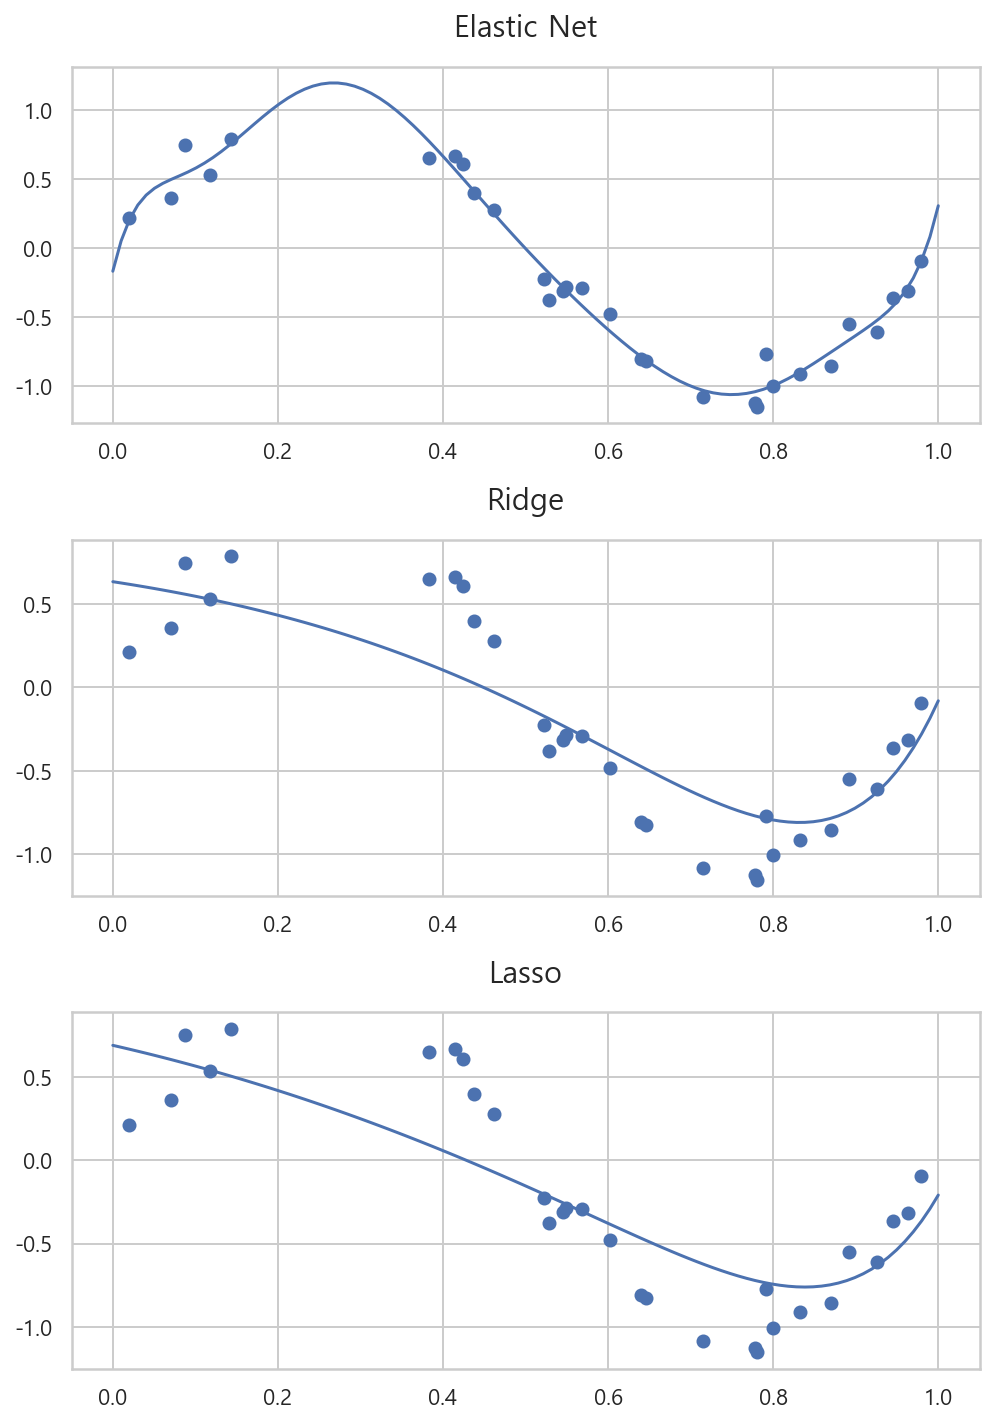

In [13]:
%matplotlib inline

plt.figure(figsize=(7, 10))

ax1 = plt.subplot(311)
plot_statsmodels(result1, ax=ax1, model_name="Elastic Net")

ax2 = plt.subplot(312)
plot_statsmodels(result2, ax=ax2, model_name="Ridge")

ax3 = plt.subplot(313)
plot_statsmodels(result3, ax=ax3, model_name="Lasso")

plt.tight_layout()

In [15]:
xx = np.linspace(0, 1, 100)
dfxx = pd.DataFrame(xx, columns=["x"])
dfxx = sm.add_constant(dfxx)
dfxx.head()

,const,x
0,1.0,0.000000
1,1.0,0.010101
2,1.0,0.020202
3,1.0,0.030303
4,1.0,0.040404


In [22]:
pred_non = result1.predict(dfxx)
pred_non

0    -0.169863
1     0.050210
2     0.204304
3     0.310191
4     0.382178
        ...   
95   -0.318012
96   -0.219289
97   -0.090260
98    0.080005
99    0.305097
Length: 100, dtype: float64

In [17]:
pred_ridge = result2.predict(dfxx)
pred_ridge

0     0.633087
1     0.625330
2     0.617350
3     0.609142
4     0.600700
        ...   
95   -0.437642
96   -0.362932
97   -0.278980
98   -0.185126
99   -0.080671
Length: 100, dtype: float64

In [18]:
pred_lasso = result3.predict(dfxx)
pred_lasso

0     0.687949
1     0.676428
2     0.664679
3     0.652699
4     0.640491
        ...   
95   -0.487150
96   -0.429479
97   -0.364330
98   -0.291136
99   -0.209299
Length: 100, dtype: float64

In [23]:
result4 = models.fit_regularized(alpha=0.01, L1_wt=0.5)
print(result4.params)

Intercept    0.656203
x           -0.849745
I(x ** 2)   -1.262902
I(x ** 3)   -0.425687
I(x ** 4)    0.000000
I(x ** 5)    0.000000
I(x ** 6)    0.000000
I(x ** 7)    0.304049
I(x ** 8)    0.631908
I(x ** 9)    0.801206
dtype: float64


In [24]:
pred_elastic = result4.predict(dfxx)
pred_elastic.head()

0    0.656203
1    0.647491
2    0.638518
3    0.629282
4    0.619781
dtype: float64

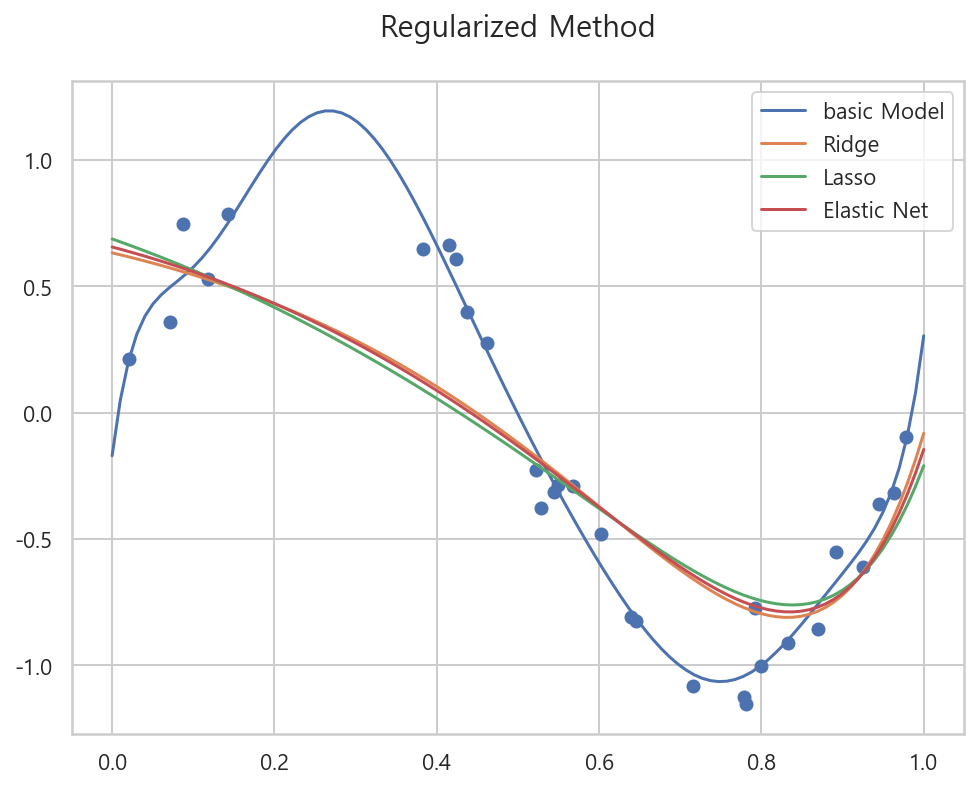

In [26]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y)
plt.plot(xx, pred_non.values, label="basic Model")
plt.plot(xx, pred_ridge.values, label="Ridge")
plt.plot(xx, pred_lasso.values, label="Lasso")
plt.plot(xx, pred_elastic.values, label="Elastic Net")

plt.title("Regularized Method", fontsize=15, y=1.05)
plt.legend()
plt.show() ; 

In [27]:
def plot_sklearn(model) : 
    plt.scatter(X, y)
    xx = np.linspace(0, 1, 1000)
    plt.plot(xx, model.predict(xx[:, np.newaxis]))
    plt.show() ; 

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [29]:
poly = PolynomialFeatures(9)
poly

PolynomialFeatures(degree=9)

In [40]:
poly.get_feature_names

<bound method PolynomialFeatures.get_feature_names of PolynomialFeatures(degree=9)>

In [48]:
print(poly.get_params(1))

{'degree': 9, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


In [30]:
model = make_pipeline(poly, LinearRegression()).fit(X, y)
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

In [31]:
print(model.steps[1][1].coef_)

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


In [36]:
model.steps[1][1].coef_

array([ 0.00000000e+00,  2.57357731e+01, -4.28141683e+02,  3.86672311e+03,
       -1.83409397e+04,  4.93260725e+04, -7.88847431e+04,  7.45386451e+04,
       -3.84531322e+04,  8.35025499e+03])

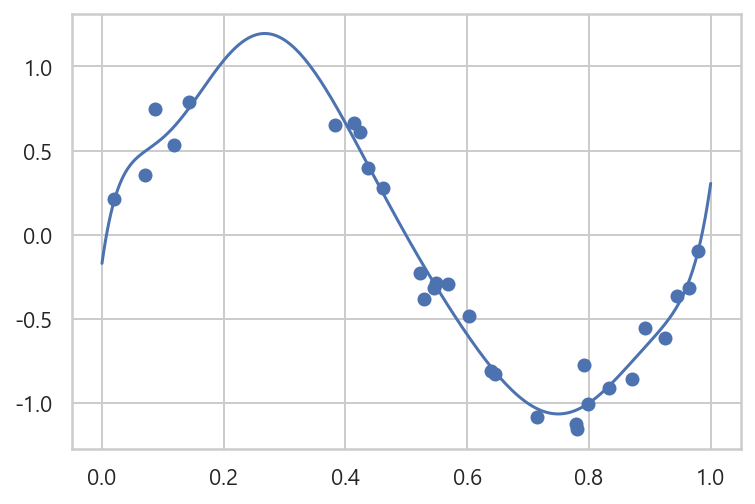

In [37]:
plot_sklearn(model)

In [56]:
model2 = make_pipeline(poly, Ridge(alpha=0.01)).fit(X, y)
model2

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('ridge', Ridge(alpha=0.01))])

In [57]:
print(model.steps[1][1].coef_)

[ 0.00000000e+00  2.57357731e+01 -4.28141683e+02  3.86672311e+03
 -1.83409397e+04  4.93260725e+04 -7.88847431e+04  7.45386451e+04
 -3.84531322e+04  8.35025499e+03]


In [58]:
print(model2.steps[1][1].coef_)

[ 0.          1.51430399 -3.90160797 -2.6359859  -0.41526792  1.07530175
  1.64913273  1.52026782  0.94651401  0.13299614]


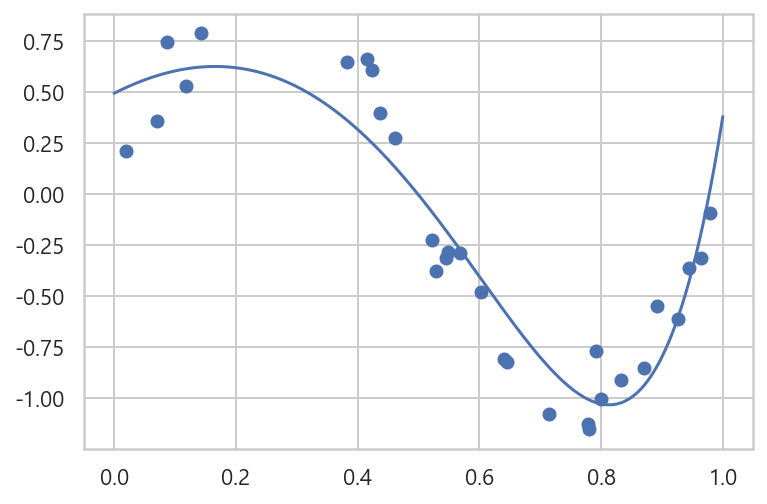

In [59]:
plot_sklearn(model2)

In [62]:
model3 = make_pipeline(poly, Lasso(alpha=0.01)).fit(X, y)
print(model2.steps[1][1].coef_)

[ 0.         -0.07668852 -2.44096313 -0.         -0.          0.
  0.          0.          0.          1.88188725]


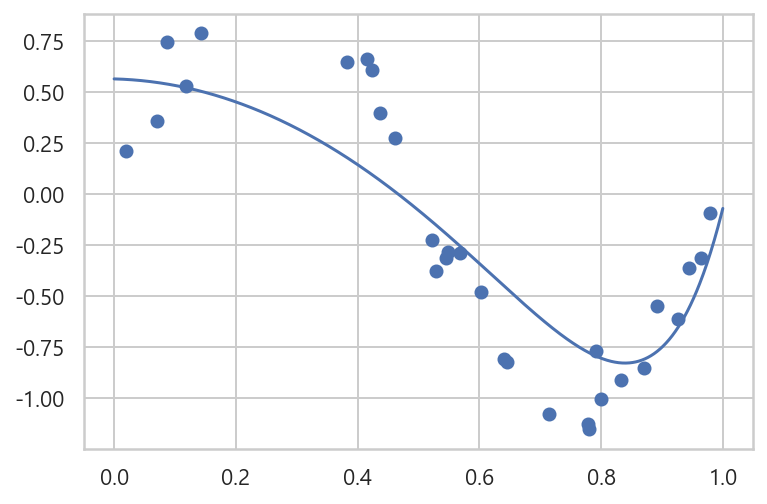

In [63]:
plot_sklearn(model3)

In [66]:
test = poly.fit_transform(X)
test[:2]

array([[1.00000000e+00, 2.02183974e-02, 4.08783595e-04, 8.26494919e-06,
        1.67104028e-07, 3.37857564e-09, 6.83093851e-11, 1.38110630e-12,
        2.79237560e-14, 5.64573598e-16],
       [1.00000000e+00, 7.10360582e-02, 5.04612156e-03, 3.58456585e-04,
        2.54633428e-05, 1.80881550e-06, 1.28491123e-07, 9.12750292e-09,
        6.48381829e-10, 4.60584893e-11]])

In [68]:
len(test[0])

10

In [69]:
model4 = make_pipeline(poly, ElasticNet(alpha=0.01, l1_ratio=0.5)).fit(X, y)
print(model4.steps[1][1].coef_)

[ 0.         -0.83768018 -1.23944649 -0.50166684 -0.          0.
  0.          0.30382246  0.62459231  0.84262899]


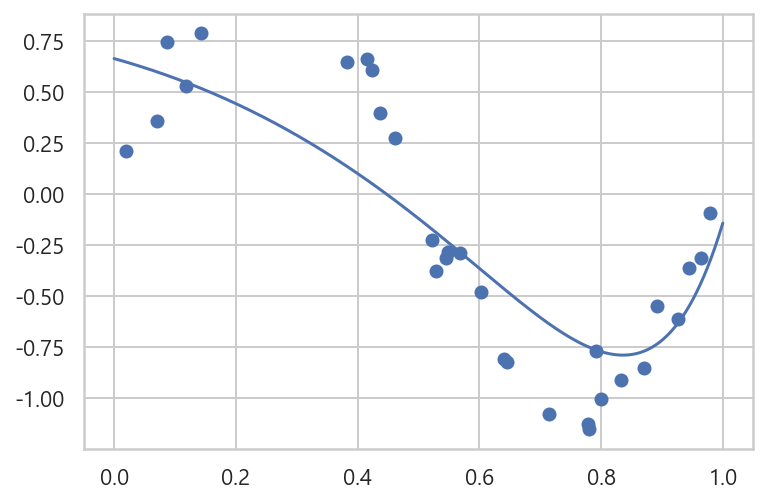

In [70]:
plot_sklearn(model4)

In [73]:
from sklearn.datasets import load_diabetes

In [74]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

In [77]:
X[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [78]:
y[:3]

array([151.,  75., 141.])

In [79]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [87]:
1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01

(0.001, 0.01, 0.1, 1.0, 10.0)

In [88]:
data = []

for i, a in enumerate(alpha) : 
    ridge = Ridge(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))    

In [90]:
data[:2]

[0     152.133484
 1      -9.551414
 2    -239.090354
 3     520.363367
 4     323.828627
 5    -712.328205
 6     413.383794
 7      65.811629
 8     167.513774
 9     720.944468
 10     68.122100
 dtype: float64,
 0     152.133484
 1      -7.199457
 2    -234.552930
 3     520.583136
 4     320.523356
 5    -380.607066
 6     150.483752
 7     -78.591232
 8     130.313059
 9     592.349587
 10     71.133768
 dtype: float64]

In [92]:
ridge.intercept_

152.133484162896

In [93]:
ridge.coef_

array([ 19.8128221 ,  -0.91845769,  75.416167  ,  55.0254194 ,
        19.92460023,  13.94868635, -47.55381556,  48.25942029,
        70.14406834,  44.21387565])

In [94]:
X.shape

(442, 10)

In [97]:
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-9.551414,-7.199457,1.307349,29.465746,19.812822
2,-239.090354,-234.552930,-207.194814,-83.154885,-0.918458
3,520.363367,520.583136,489.691080,306.351627,75.416167
4,323.828627,320.523356,301.769437,201.629434,55.025419
5,-712.328205,-380.607066,-83.466074,5.909369,19.924600
6,413.383794,150.483752,-70.828096,-29.515927,13.948686
7,65.811629,-78.591232,-188.680164,-152.040465,-47.553816
8,167.513774,130.313059,115.712703,117.311715,48.259420
9,720.944468,592.349587,443.814054,262.944995,70.144068


In [98]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [99]:
data = []

for i, a in enumerate(alpha) : 
    lasso = Lasso(alpha=a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
data[0]

0     152.133484
1      -8.998449
2    -238.899740
3     520.261362
4     323.429484
5    -720.251734
6     421.405141
7      66.734168
8     164.448873
9     725.340440
10     67.475538
dtype: float64

In [100]:
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.010,0.100,1.000,10.000
0,152.133484,152.133484,152.133484,152.133484,152.133484
1,-8.998449,-1.306575,-0.000000,0.000000,0.000000
2,-238.899740,-228.822331,-155.362882,-0.000000,0.000000
3,520.261362,525.560658,517.182017,367.701852,0.000000
4,323.429484,316.175320,275.082351,6.301904,0.000000
5,-720.251734,-307.013677,-52.540269,0.000000,0.000000
6,421.405141,89.321688,-0.000000,0.000000,0.000000
7,66.734168,-105.081398,-210.159753,-0.000000,-0.000000
8,164.448873,119.597989,0.000000,0.000000,0.000000
9,725.340440,571.330871,483.914409,307.605700,0.000000


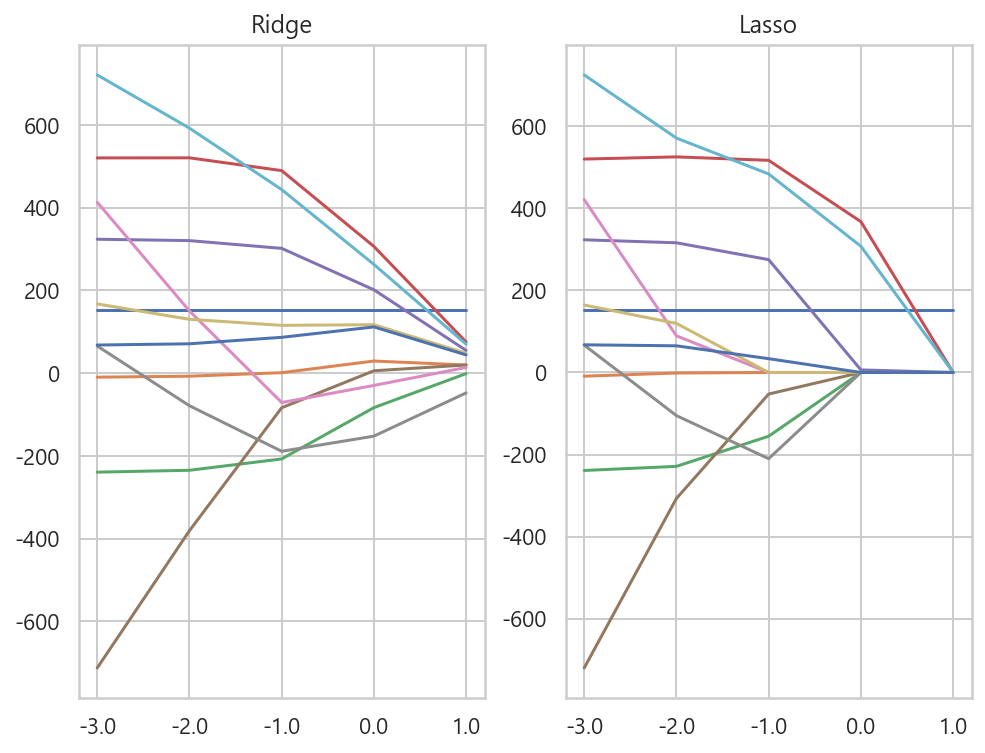

In [102]:
plt.figure(figsize=(8, 6))

ax1 = plt.subplot(121)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(122)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

plt.show() ; 

In [103]:
np.log10(alpha)

array([-3., -2., -1.,  0.,  1.])

In [104]:
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [105]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [106]:
boston = load_boston()
X = boston.data
y = boston.target

In [107]:
alphas = np.logspace(-4, 0, 200)
alphas[:5]

array([0.0001    , 0.00010474, 0.0001097 , 0.0001149 , 0.00012034])

In [109]:
train_scores = []
test_scores = []

for alpha in alphas : 
    model = Lasso(alpha=alpha)
    train_score = - mean_squared_error(y, model.fit(X, y).predict(X))
    test_score = np.mean(cross_val_score(
        model, X, y, scoring="neg_mean_squared_error", cv=5))
    train_scores.append(train_score)
    test_scores.append(test_score)

In [111]:
train_scores[:5]

[-21.89483484692291,
 -21.894835202362977,
 -21.894835592274195,
 -21.89483602017137,
 -21.89483648938663]

In [112]:
test_scores[:5]

[-37.12105617157192,
 -37.12054812693028,
 -37.12001550752816,
 -37.119458459992636,
 -37.11887097571741]

In [113]:
optimal_alpha = alphas[np.argmax(test_scores)]
optimal_score = np.max(test_scores)

In [114]:
optimal_alpha

0.34489622604057596

In [115]:
optimal_score

-34.439569709041926

In [117]:
np.argmax(test_scores)

176

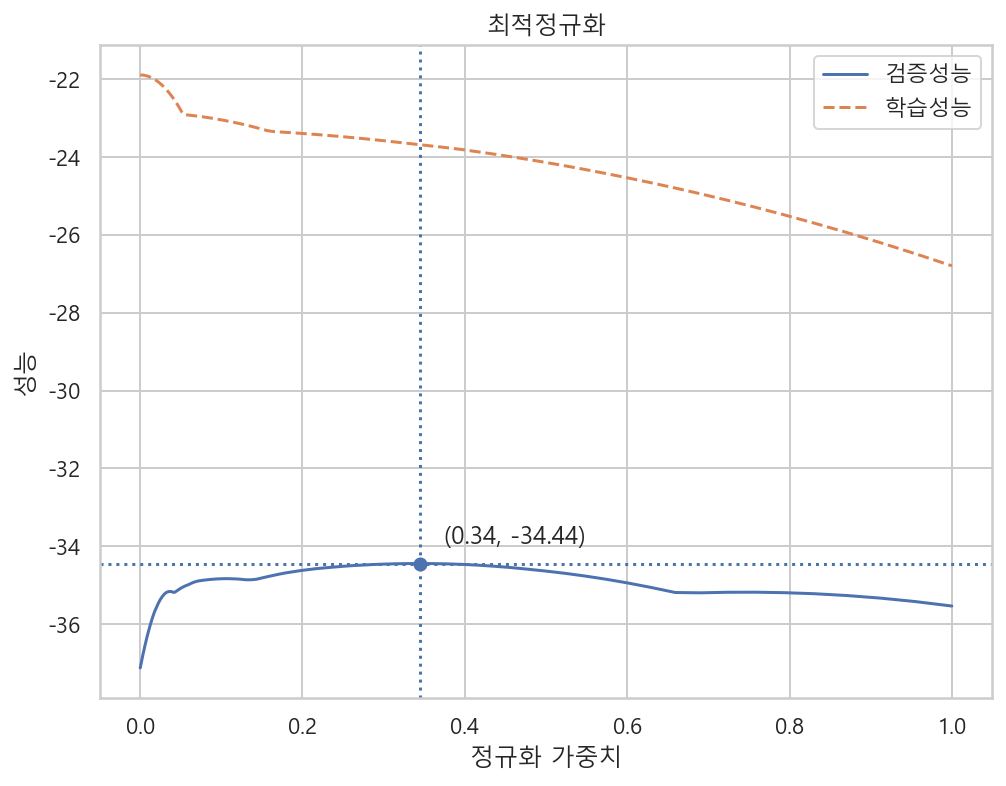

In [137]:
plt.figure(figsize=(8, 6))
plt.plot(alphas, test_scores, "-", label="검증성능")
plt.plot(alphas, train_scores, "--", label="학습성능")
plt.axhline(optimal_score, linestyle=":")
plt.axvline(optimal_alpha, linestyle=":")
plt.scatter(optimal_alpha, optimal_score)
plt.text(optimal_alpha + 0.03, optimal_score + 0.5, 
         "({}, {})".format(round(optimal_alpha, 2), round(optimal_score, 2)),
        fontsize=12)

plt.title("최적정규화")
plt.xlabel("정규화 가중치")
plt.ylabel("성능")
plt.legend()
plt.show() ; 

In [138]:
from sklearn.datasets import load_boston
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

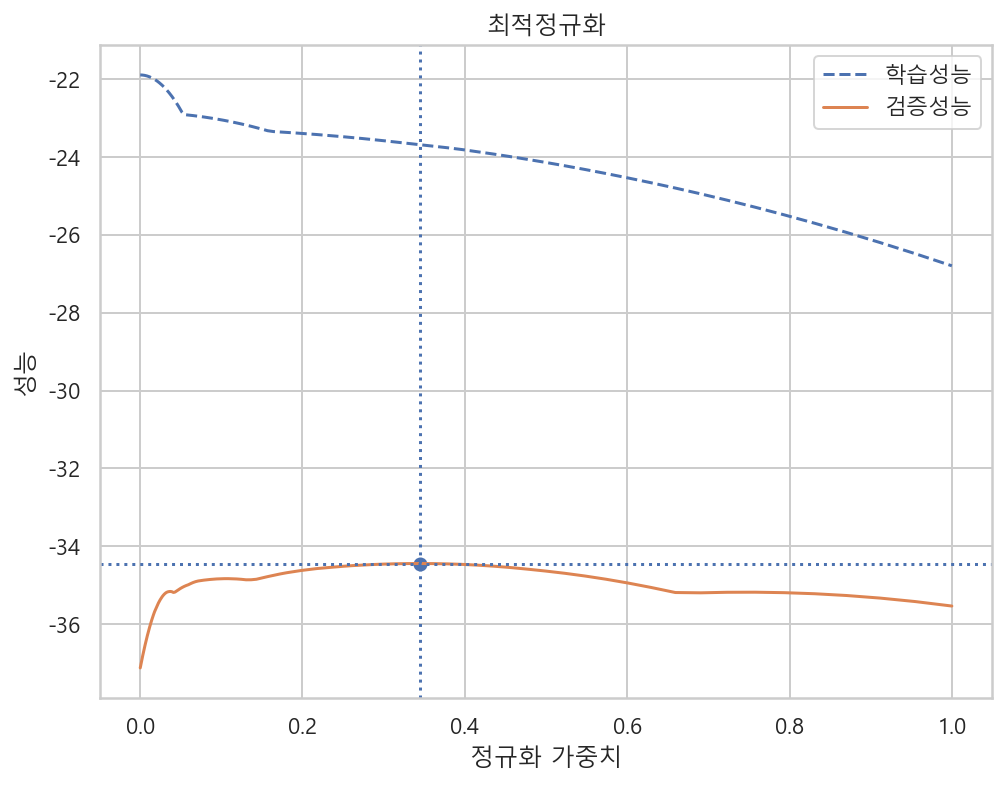

In [145]:
bt = load_boston()
x_data = bt.data
y_data = bt.target

lambda_value = np.logspace(-4, 0, 200)
scores_train = []
scores_test = []

for l in lambda_value : 
    model = Lasso(alpha=l)
    train = - mean_squared_error(y_data, model.fit(x_data, y_data).predict(x_data))
    test = np.mean(cross_val_score(model, x_data, y_data, 
                                   scoring="neg_mean_squared_error", cv=5))
    scores_train.append(train)
    scores_test.append(test)

optimal_lambda = lambda_value[np.argmax(scores_test)]
optimal_score = np.max(scores_test)
    
plt.figure(figsize=(8, 6))
plt.plot(lambda_value, scores_train, "--", label="학습성능")
plt.plot(lambda_value, scores_test, "-", label="검증성능")
plt.axhline(optimal_score, linestyle=":")
plt.axvline(optimal_lambda, linestyle=":")
plt.scatter(optimal_lambda, optimal_score)
plt.title("최적정규화")
plt.xlabel("정규화 가중치")
plt.ylabel("성능")
plt.legend()
plt.show() ; 

In [146]:
from sklearn.model_selection import validation_curve

In [150]:
train_score, test_score = validation_curve(
    estimator=Lasso(), X=X, y=y, param_name="alpha", param_range=alphas, cv=5,
    scoring="neg_mean_squared_error")

In [151]:
train_score[:5]

array([[-24.58923345, -22.24092762, -21.19052252, -12.9175669 ,
        -22.73719333],
       [-24.58923376, -22.24092817, -21.19052292, -12.91756726,
        -22.73719372],
       [-24.58923411, -22.24092878, -21.19052336, -12.91756764,
        -22.73719414],
       [-24.58923449, -22.24092944, -21.19052385, -12.91756806,
        -22.73719461],
       [-24.5892349 , -22.24093017, -21.19052437, -12.91756853,
        -22.73719512]])

In [152]:
test_score[:5]

array([[-12.4573055 , -26.02785644, -33.05876259, -80.76121656,
        -33.30013977],
       [-12.45716363, -26.02687505, -33.05803481, -80.76116473,
        -33.29950241],
       [-12.45701515, -26.02584795, -33.05727272, -80.76110679,
        -33.29883492],
       [-12.45685965, -26.02477241, -33.0564746 , -80.76104976,
        -33.29813588],
       [-12.45669668, -26.02364615, -33.05563864, -80.76098625,
        -33.29738716]])

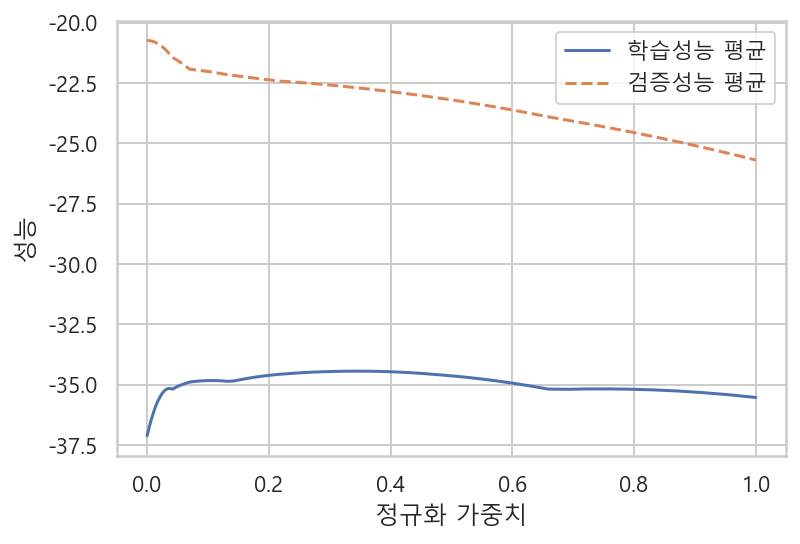

In [153]:
plt.plot(alphas, test_score.mean(axis=1), "-", label="학습성능 평균")
plt.plot(alphas, train_score.mean(axis=1), "--", label="검증성능 평균")
plt.xlabel("정규화 가중치")
plt.ylabel("성능")
plt.legend()
plt.show() ; 

In [154]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

In [156]:
n_samples = 100
np.random.seed(0)
X = np.sort(np.random.rand(n_samples))
y = np.sin(2 * np.pi * X) + np.random.randn(n_samples) * 0.5
X = X[:, np.newaxis]

In [169]:
model = Pipeline(
    [("poly", PolynomialFeatures()),
    ("lreg", LinearRegression())])
model

Pipeline(steps=[('poly', PolynomialFeatures()), ('lreg', LinearRegression())])

In [172]:
model.steps[1][1]

LinearRegression()

In [173]:
degrees = np.arange(1, 15)
train_scores, test_scores = \
      validation_curve(model, X, y, 
                       param_name="poly__degree", param_range=degrees,
                       cv=100, scoring="neg_mean_squared_error")

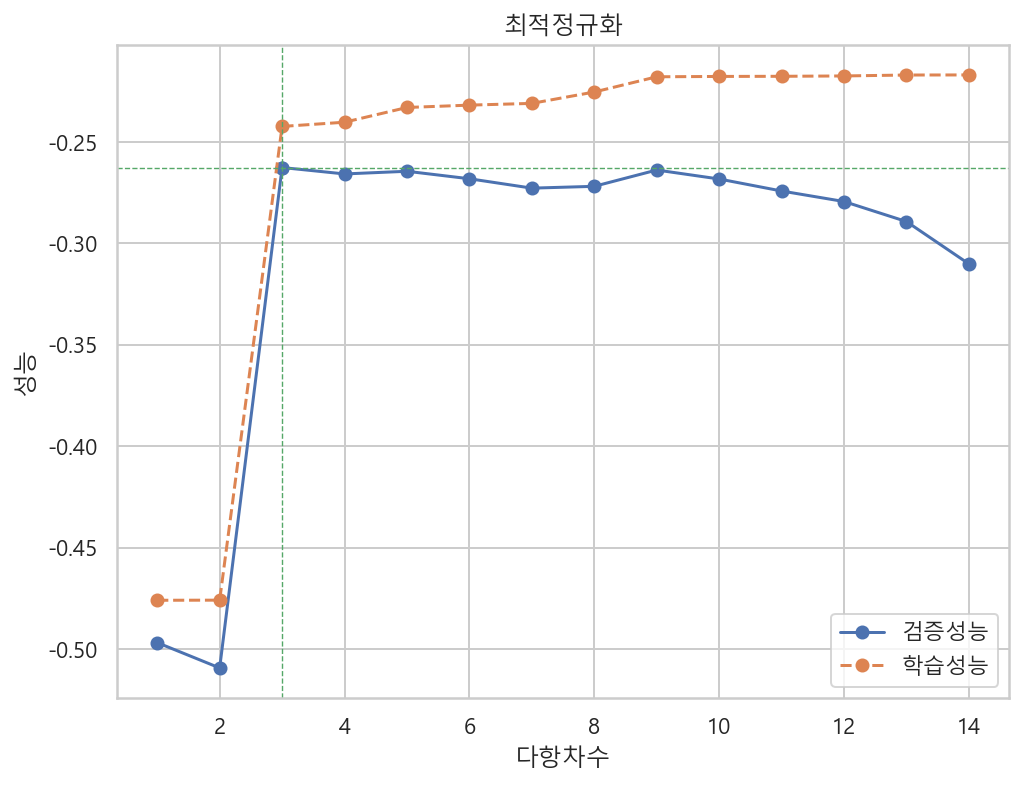

In [183]:
plt.figure(figsize=(8, 6))
plt.plot(degrees, test_scores.mean(axis=1), "o-", label="검증성능")
plt.plot(degrees, train_scores.mean(axis=1), "o--", label="학습성능")
plt.scatter(optimal_degree, optimal_score)
plt.axhline(optimal_score, c="g", linestyle="--", lw=0.7)
plt.axvline(optimal_degree, c="g", linestyle="--", lw=0.7)
plt.title("최적정규화")
plt.xlabel("다항차수")
plt.ylabel("성능")
plt.legend()
plt.show() ; 

In [175]:
mean_test = test_scores.mean(axis=1)
mean_test[:5]

array([-0.49683912, -0.50931781, -0.26256933, -0.26573226, -0.26441657])

In [176]:
mean_train = train_scores.mean(axis=1)
mean_train[:5]

array([-0.47594921, -0.47588899, -0.24230781, -0.24022839, -0.23296025])

In [177]:
optimal_score = np.max(mean_test)
optimal_score

-0.2625693318830821

In [179]:
optimal_degree = degrees[np.argmax(mean_test)]
optimal_degree

3

In [194]:
np.sort(mean_test)[-2]

-0.26380045229448745

In [191]:
np.argmax(mean_test)

2

In [187]:
mean_test

array([-0.49683912, -0.50931781, -0.26256933, -0.26573226, -0.26441657,
       -0.26810626, -0.27273421, -0.27183967, -0.26380045, -0.26822353,
       -0.27414621, -0.2793327 , -0.28920307, -0.31008064])

In [199]:
test = np.array([1, 2, 3, 4])
test

array([1, 2, 3, 4])

In [204]:
mean_test[8]

-0.26380045229448745